In [1]:
#General imports.

%matplotlib inline
import mpld3
mpld3.enable_notebook()
import matplotlib.pyplot as plt
import matplotlib 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)
def setint():
    mpld3.enable_notebook()
    matplotlib.rc('xtick', labelsize=10) 
    matplotlib.rc('ytick', labelsize=10)
def noint():
    mpld3.disable_notebook()
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20)


import ROOT as r
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import csv
import pandas

#import seaborn as sns
#sns.set(style="ticks", color_codes=True)
import numpy as np
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

plt.rcParams['figure.facecolor'] = 'white'

noint()

Welcome to JupyROOT 6.12/06


---

### Lets first look at the EOF pulses

In [2]:
f = r.TFile("./time_gt_0.root")
#f = r.TFile("./time_gt_0_v9_17_01.root")
f.ls()

TFile**		./time_gt_0.root	
 TFile*		./time_gt_0.root	
  KEY: TCanvas	c1;1	c1


In [3]:
cf = f.Get("c1")
print([x for x in cf.GetListOfPrimitives()])

[<ROOT.TFrame object ("TFrame") at 0x7fffe210d0c0>, <ROOT.TH2F object ("htemp") at 0x7fffe2112470>, <ROOT.TPaveText object ("title") at 0x7fffe2278fb0>, <ROOT.TGraph object ("Graph") at 0x7fffe22862a0>]


In [4]:
h = cf.GetPrimitive("htemp").Clone()
gr = cf.GetPrimitive("Graph").Clone()

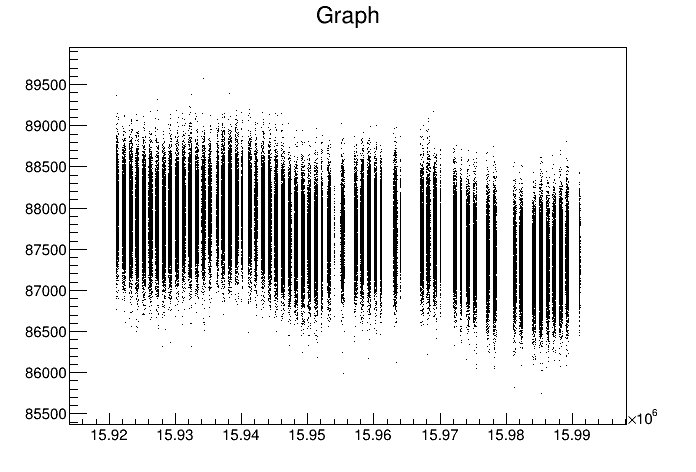

In [5]:
c = r.TCanvas()
#h.Draw()
gr.Draw("ap")
c.Draw()

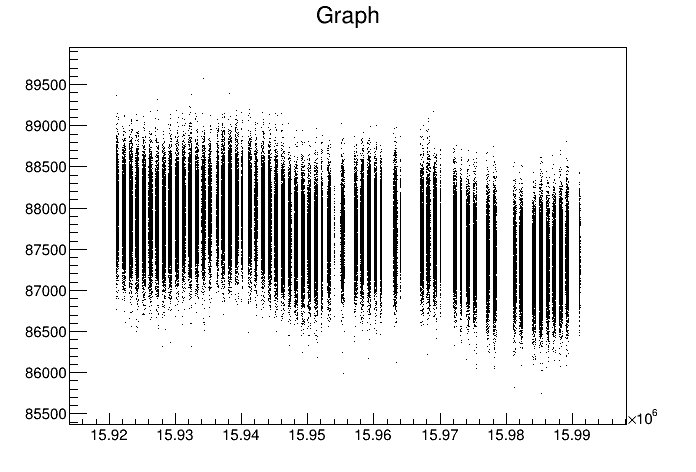

In [6]:
c = r.TCanvas()
#h.Draw()
gr.Draw("ap")

c.Draw()

In [7]:
h = r.TH2D("h","Energy of EoF Pulses vs. Run/SubRun Number; Run*1000 + SubRun; Energy [MeV]",
           int(72000/1000), 15920000, 15992000,
           4000, 85500, 89500)

In [8]:
for i in range(gr.GetN()):
    #if(i > 10):
    #    break
    x,y = r.Double(0.),r.Double(0.)
    gr.GetPoint(i,(x),(y))
    #print(x,y)
    h.Fill(x,y)

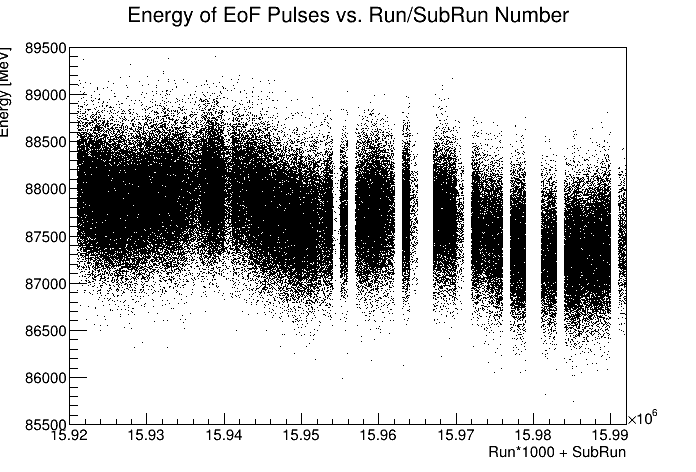

In [9]:
c = r.TCanvas()
h.Draw()
#gr.Draw("ap")

c.Draw()

In [10]:
h.SetDirectory(0)

In [11]:
hx = h.ProfileX().Clone()
hx.SetTitle("Average Energy of EoF Pulses vs. Run/SubRun Number")

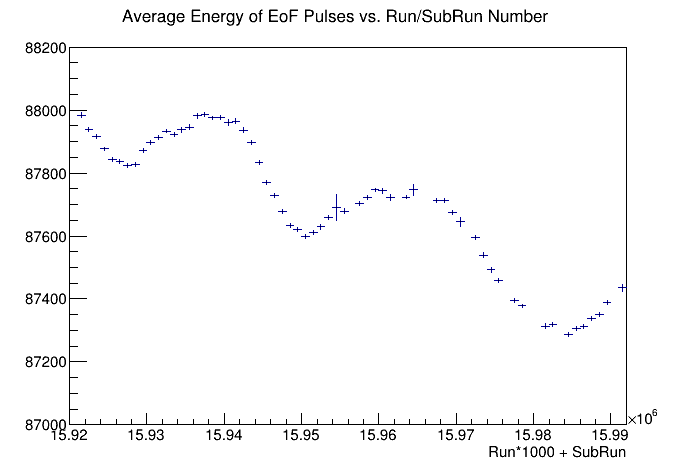

In [12]:
c = r.TCanvas()
hx.GetYaxis().SetRangeUser(87000,88200)
hx.Draw()
c.Draw()

In [13]:
print(hx.GetMaximumBin())
print(hx.GetBinContent(hx.GetMaximumBin()))

18
87984.89637892014


In [14]:
hx_scaled = hx.Clone()
hx_scaled.Scale(1/hx_scaled.GetBinContent(hx_scaled.GetMaximumBin()))

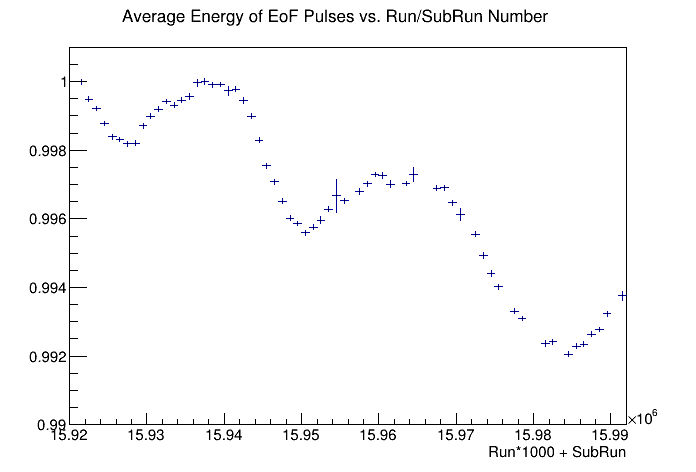

In [15]:
c = r.TCanvas()
hx_scaled.GetYaxis().SetRangeUser(0.99,1.001)
hx_scaled.Draw()
c.Draw()

---

### Now for the Sync Pulses. We know these are f**ked

In [16]:
f3 = r.TFile("./time_lt_0_v9_17_01_full_calo1.root")
f3.ls()

TFile**		./time_lt_0_v9_17_01_full_calo1.root	
 TFile*		./time_lt_0_v9_17_01_full_calo1.root	
  KEY: TCanvas	c1;1	c1


In [17]:
cf3 = f3.Get("c1")
print([x for x in cf3.GetListOfPrimitives()])

[<ROOT.TFrame object ("TFrame") at 0x7fffe2ca6c30>, <ROOT.TH2F object ("htemp") at 0x7fffe2355ad0>, <ROOT.TPaveText object ("title") at 0x7fffe2c97160>, <ROOT.TGraph object ("Graph") at 0x7fffe2ca4a30>]


In [18]:
h3 = cf3.GetPrimitive("htemp").Clone()
gr3 = cf3.GetPrimitive("Graph").Clone()

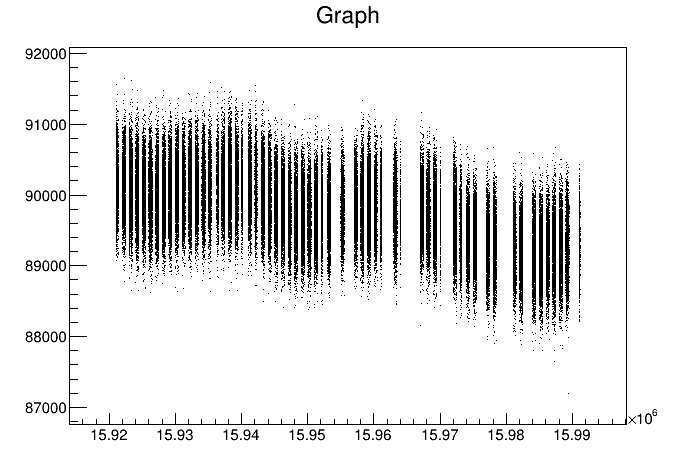

In [19]:
c = r.TCanvas()
#h.Draw()
gr3.Draw("ap")
c.Draw()

In [20]:
h3 = r.TH2D("h3","Energy of Sync Pulses vs. Run/SubRun Number; Run*1000 + SubRun; Energy [MeV]",
           int(72000/1000), 15920000, 15992000,
           14000, 85500, 99500)

In [21]:
for i in range(gr3.GetN()):
    #if(i > 10):
    #    break
    x,y = r.Double(0.),r.Double(0.)
    gr3.GetPoint(i,(x),(y))
    #print(x,y)
    h3.Fill(x,y)

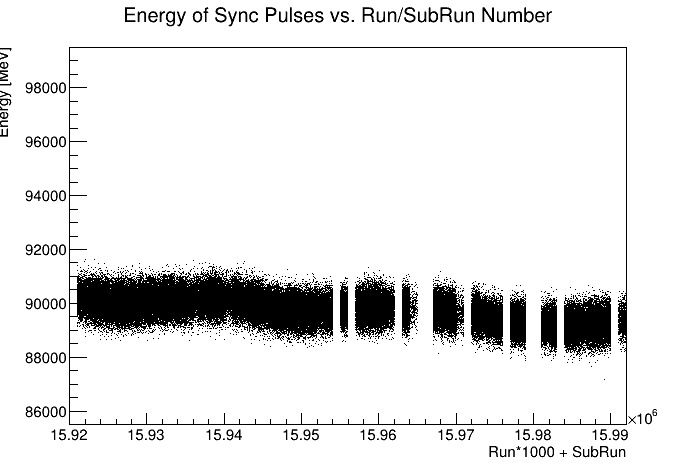

In [22]:
c = r.TCanvas()
h3.Draw()
#gr.Draw("ap")

c.Draw()

In [23]:
h3.SetDirectory(0)

In [24]:
hx3 = h3.ProfileX().Clone()
hx3.SetTitle("Average Energy of Sync Pulses vs. Run/SubRun Number")

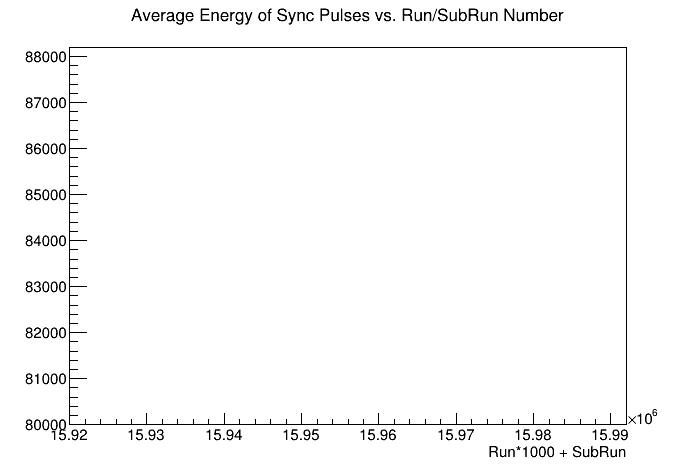

In [25]:
c = r.TCanvas()
hx3.GetYaxis().SetRangeUser(80000,88200)
hx3.Draw()
c.Draw()

In [26]:
print(hx3.GetMaximumBin())
print(hx3.GetBinContent(hx.GetMaximumBin()))

21
90174.21827706635


In [27]:
hx3_scaled = hx3.Clone()
hx3_scaled.SetLineColor(3)
hx3_scaled.SetMarkerColor(3)
hx3_scaled.Scale(1/hx3_scaled.GetBinContent(hx3_scaled.GetMaximumBin()))

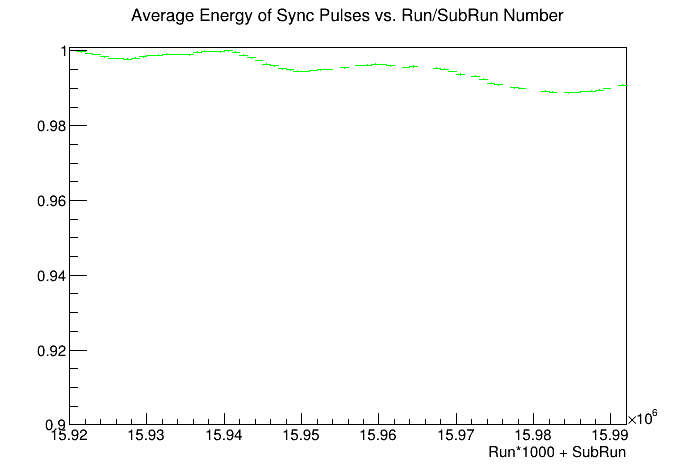

In [28]:
c = r.TCanvas()
hx3_scaled.GetYaxis().SetRangeUser(0.9,1.001)
hx3_scaled.Draw()
c.Draw()

---

### Now lets see if we see another modulation in energy for the actual positrons we are measuring

In [29]:
#f2 = r.TFile("./time_gt_0_energy_lt_20000.root")
f2 = r.TFile("./time_gt_0_positrons_v9_17_01_full_calo1.root")
f2.ls()

TFile**		./time_gt_0_positrons_v9_17_01_full_calo1.root	
 TFile*		./time_gt_0_positrons_v9_17_01_full_calo1.root	
  KEY: TCanvas	c1;1	c1


In [30]:
cf2 = f2.Get("c1")
print([x for x in cf2.GetListOfPrimitives()])

[<ROOT.TFrame object ("TFrame") at 0x7fffe2c934c0>, <ROOT.TH2F object ("htemp") at 0x7fffe2cc7170>, <ROOT.TPaveText object ("title") at 0x7fffe2ff0ea0>, <ROOT.TGraph object ("Graph") at 0x7fffe2cc7600>, <ROOT.TGraph object ("Graph") at 0x7fffe1ec6f00>, <ROOT.TGraph object ("Graph") at 0x7fffe2cbb820>, <ROOT.TGraph object ("Graph") at 0x7fffe2ca0cf0>, <ROOT.TGraph object ("Graph") at 0x7fffe294f9d0>, <ROOT.TGraph object ("Graph") at 0x7fffe2cde130>, <ROOT.TGraph object ("Graph") at 0x7fffe2cac400>, <ROOT.TGraph object ("Graph") at 0x7fffe3007ea0>, <ROOT.TGraph object ("Graph") at 0x7fffe3008100>, <ROOT.TGraph object ("Graph") at 0x7fffe2cba3e0>, <ROOT.TGraph object ("Graph") at 0x7fffe2cba580>, <ROOT.TGraph object ("Graph") at 0x7fffe3007770>, <ROOT.TGraph object ("Graph") at 0x7fffe23557c0>, <ROOT.TGraph object ("Graph") at 0x7fffe23559d0>, <ROOT.TGraph object ("Graph") at 0x7fffe2ce4590>, <ROOT.TGraph object ("Graph") at 0x7fffe2ce09c0>, <ROOT.TGraph object ("Graph") at 0x7fffe2ce0fc0

In [31]:
hp = r.TH2D("hp","Energy of Positrons vs. Run/SubRun Number; Run*1000 + SubRun; Energy [MeV]",
           int(72000/1000), 15920000, 15992000,
           6000, 0, 6000)

In [32]:
for i, x in enumerate(cf2.GetListOfPrimitives()):
    if(x.GetName() != 'Graph'):
        continue
    else:
        print("Starting", x)
        
    x.SetName("Graph_"+str(i+1))
    

Starting <ROOT.TGraph object ("Graph") at 0x7fffe2cc7600>
Starting <ROOT.TGraph object ("Graph") at 0x7fffe1ec6f00>
Starting <ROOT.TGraph object ("Graph") at 0x7fffe2cbb820>
Starting <ROOT.TGraph object ("Graph") at 0x7fffe2ca0cf0>
Starting <ROOT.TGraph object ("Graph") at 0x7fffe294f9d0>
Starting <ROOT.TGraph object ("Graph") at 0x7fffe2cde130>
Starting <ROOT.TGraph object ("Graph") at 0x7fffe2cac400>
Starting <ROOT.TGraph object ("Graph") at 0x7fffe3007ea0>
Starting <ROOT.TGraph object ("Graph") at 0x7fffe3008100>
Starting <ROOT.TGraph object ("Graph") at 0x7fffe2cba3e0>
Starting <ROOT.TGraph object ("Graph") at 0x7fffe2cba580>
Starting <ROOT.TGraph object ("Graph") at 0x7fffe3007770>
Starting <ROOT.TGraph object ("Graph") at 0x7fffe23557c0>
Starting <ROOT.TGraph object ("Graph") at 0x7fffe23559d0>
Starting <ROOT.TGraph object ("Graph") at 0x7fffe2ce4590>
Starting <ROOT.TGraph object ("Graph") at 0x7fffe2ce09c0>
Starting <ROOT.TGraph object ("Graph") at 0x7fffe2ce0fc0>


In [33]:
print([x for x in cf2.GetListOfPrimitives()])

[<ROOT.TFrame object ("TFrame") at 0x7fffe2c934c0>, <ROOT.TH2F object ("htemp") at 0x7fffe2cc7170>, <ROOT.TPaveText object ("title") at 0x7fffe2ff0ea0>, <ROOT.TGraph object ("Graph_4") at 0x7fffe2cc7600>, <ROOT.TGraph object ("Graph_5") at 0x7fffe1ec6f00>, <ROOT.TGraph object ("Graph_6") at 0x7fffe2cbb820>, <ROOT.TGraph object ("Graph_7") at 0x7fffe2ca0cf0>, <ROOT.TGraph object ("Graph_8") at 0x7fffe294f9d0>, <ROOT.TGraph object ("Graph_9") at 0x7fffe2cde130>, <ROOT.TGraph object ("Graph_10") at 0x7fffe2cac400>, <ROOT.TGraph object ("Graph_11") at 0x7fffe3007ea0>, <ROOT.TGraph object ("Graph_12") at 0x7fffe3008100>, <ROOT.TGraph object ("Graph_13") at 0x7fffe2cba3e0>, <ROOT.TGraph object ("Graph_14") at 0x7fffe2cba580>, <ROOT.TGraph object ("Graph_15") at 0x7fffe3007770>, <ROOT.TGraph object ("Graph_16") at 0x7fffe23557c0>, <ROOT.TGraph object ("Graph_17") at 0x7fffe23559d0>, <ROOT.TGraph object ("Graph_18") at 0x7fffe2ce4590>, <ROOT.TGraph object ("Graph_19") at 0x7fffe2ce09c0>, <ROOT

In [34]:
for i, x in enumerate(cf2.GetListOfPrimitives()):
    #if(i>3):
    #    continue
    if(x.GetName() != 'Graph_'+str(i+1)):
        continue
    else:
        print("Starting", x)
        
    gri = cf2.GetPrimitive(x.GetName())
    
    for j in range(gri.GetN()):

        x,y = r.Double(0.),r.Double(0.)
        gri.GetPoint(j,(x),(y))
        #print(x,y)
        hp.Fill(x,y)
        
    

Starting <ROOT.TGraph object ("Graph_4") at 0x7fffe2cc7600>
Starting <ROOT.TGraph object ("Graph_5") at 0x7fffe1ec6f00>
Starting <ROOT.TGraph object ("Graph_6") at 0x7fffe2cbb820>
Starting <ROOT.TGraph object ("Graph_7") at 0x7fffe2ca0cf0>
Starting <ROOT.TGraph object ("Graph_8") at 0x7fffe294f9d0>
Starting <ROOT.TGraph object ("Graph_9") at 0x7fffe2cde130>
Starting <ROOT.TGraph object ("Graph_10") at 0x7fffe2cac400>
Starting <ROOT.TGraph object ("Graph_11") at 0x7fffe3007ea0>
Starting <ROOT.TGraph object ("Graph_12") at 0x7fffe3008100>
Starting <ROOT.TGraph object ("Graph_13") at 0x7fffe2cba3e0>
Starting <ROOT.TGraph object ("Graph_14") at 0x7fffe2cba580>
Starting <ROOT.TGraph object ("Graph_15") at 0x7fffe3007770>
Starting <ROOT.TGraph object ("Graph_16") at 0x7fffe23557c0>
Starting <ROOT.TGraph object ("Graph_17") at 0x7fffe23559d0>
Starting <ROOT.TGraph object ("Graph_18") at 0x7fffe2ce4590>
Starting <ROOT.TGraph object ("Graph_19") at 0x7fffe2ce09c0>
Starting <ROOT.TGraph object (

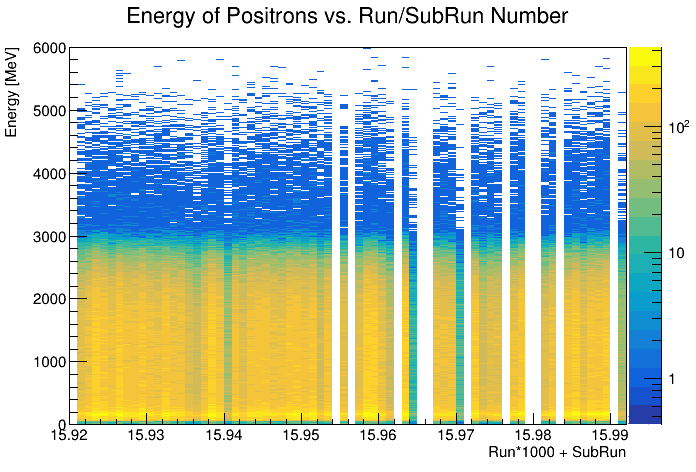

In [35]:
c = r.TCanvas()
hp.Draw("colz")
c.SetLogz()
c.Draw()

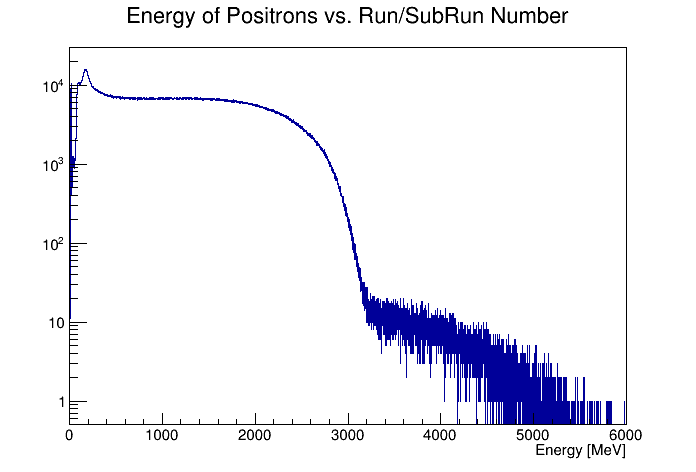

In [36]:
c = r.TCanvas()
hp.ProjectionY().Draw()
c.SetLogy()
c.Draw()

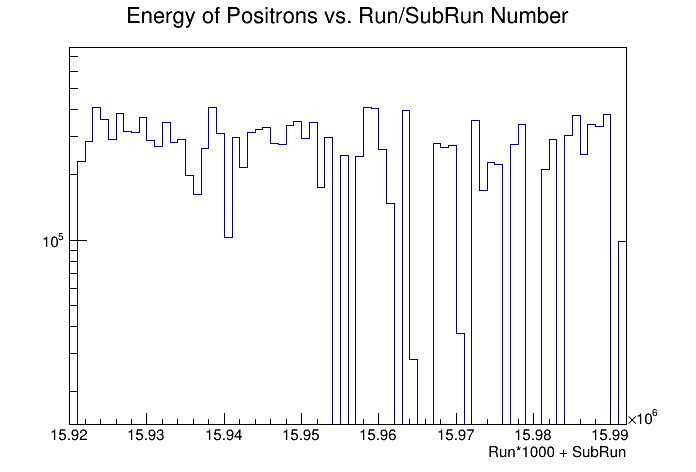

In [37]:
c = r.TCanvas()
hp.ProjectionX().Draw()
c.SetLogy()
c.Draw()

In [38]:
hp.SetDirectory(0)

In [39]:
hp.GetYaxis().SetRangeUser(1700,3000)
hxp2 = hp.ProjectionX().Clone()
hxp2.SetTitle("Average Energy of Positrons vs. Run/SubRun Number")

In [40]:
hp.GetYaxis().SetRangeUser(3000,6000)
hxp = hp.ProjectionX().Clone()
hxp.SetTitle("Average Energy of Positrons vs. Run/SubRun Number")

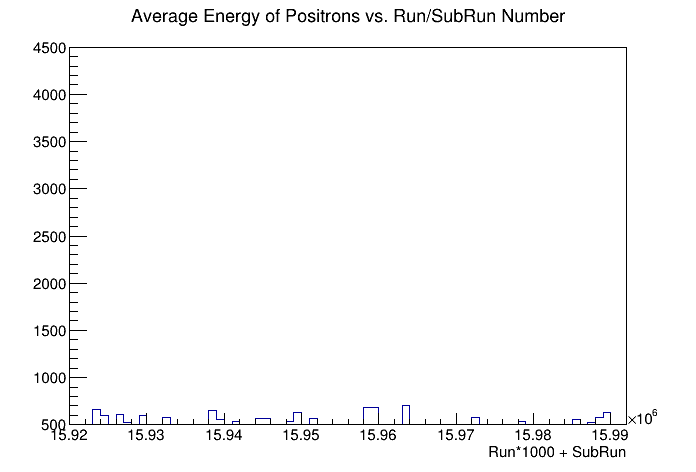

In [41]:
c = r.TCanvas()
hxp.GetYaxis().SetRangeUser(500,4500)
hxp.Draw()
c.Draw()

In [42]:
hxp_scaled = hxp.Clone()
hxp_scaled.SetTitle("Average Energy of Positrons vs. Run/SubRun Number [Scaled to Max Bin]")
hxp_scaled.Scale(1/hxp_scaled.GetBinContent(hxp_scaled.GetMaximumBin()))
hxp_scaled.SetMarkerColor(2)
hxp_scaled.SetLineColor(2)

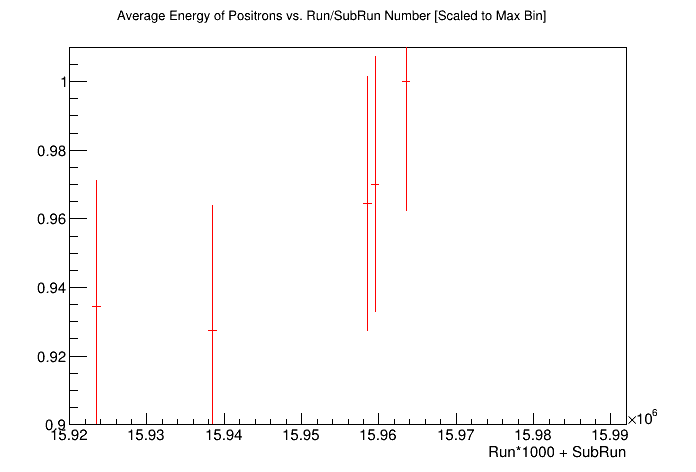

In [43]:
c = r.TCanvas()
hxp_scaled.GetYaxis().SetRangeUser(0.9,1.01)
hxp_scaled.Draw()
c.Draw()

---

### And the laser energy

In [44]:
#f2 = r.TFile("./time_gt_0_energy_lt_20000.root")
f4 = r.TFile("./laserenergies2.root")
f4.ls()

TFile**		./laserenergies2.root	
 TFile*		./laserenergies2.root	
  KEY: TCanvas	c1;1	c1


In [45]:
cf4 = f4.Get("c1")
print([x for x in cf4.GetListOfPrimitives()])

[<ROOT.TFrame object ("TFrame") at 0x7fffe2ff5ec0>, <ROOT.TH2F object ("htemp") at 0x7fffe2ff9a90>, <ROOT.TPaveText object ("title") at 0x7fffe3007900>, <ROOT.TGraph object ("Graph") at 0x7f5de0c57590>]


In [46]:
hl = r.TH2D("hl","Energy of Laser vs. Run/SubRun Number; Run*1000 + SubRun; Energy [MeV]",
           int(72000/1000), 15920000, 15992000,
           6000, 0, 6000)

In [47]:
for i, x in enumerate(cf4.GetListOfPrimitives()):
    if(x.GetName() != 'Graph'):
        continue
    else:
        print("Starting", x)
        
    x.SetName("Graph_"+str(i+1))
    

Starting <ROOT.TGraph object ("Graph") at 0x7f5de0c57590>


In [48]:
print([x for x in cf4.GetListOfPrimitives()])

[<ROOT.TFrame object ("TFrame") at 0x7fffe2ff5ec0>, <ROOT.TH2F object ("htemp") at 0x7fffe2ff9a90>, <ROOT.TPaveText object ("title") at 0x7fffe3007900>, <ROOT.TGraph object ("Graph_4") at 0x7f5de0c57590>]


In [49]:
for i, x in enumerate(cf4.GetListOfPrimitives()):
    #if(i>3):
    #    continue
    if(x.GetName() != 'Graph_'+str(i+1)):
        continue
    else:
        print("Starting", x)
        
    gri = cf4.GetPrimitive(x.GetName())
    
    for j in range(gri.GetN()):

        x,y = r.Double(0.),r.Double(0.)
        gri.GetPoint(j,(x),(y))
        #print(x,y)
        hl.Fill(x,y)
        
    

Starting <ROOT.TGraph object ("Graph_4") at 0x7f5de0c57590>


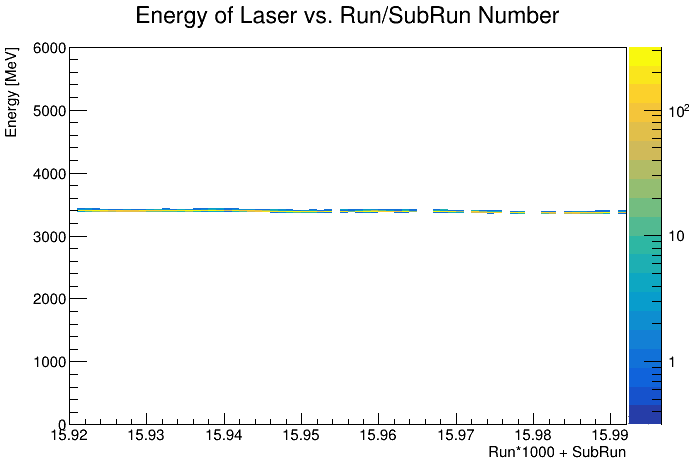

In [50]:
c = r.TCanvas()
hl.Draw("colz")
c.SetLogz()
c.Draw()

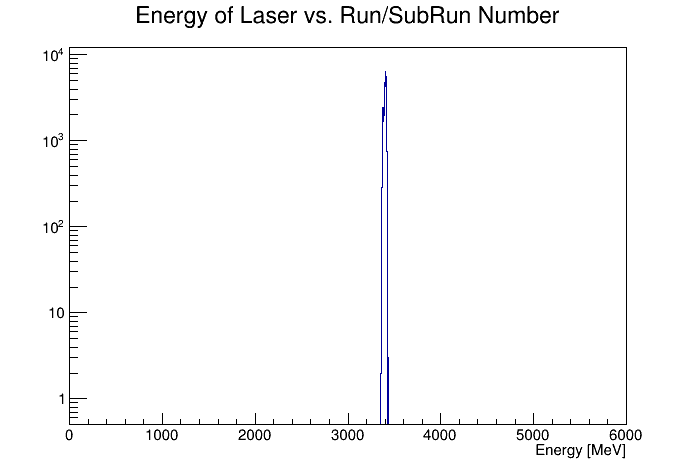

In [51]:
c = r.TCanvas()
hl.ProjectionY().Draw()
c.SetLogy()
c.Draw()

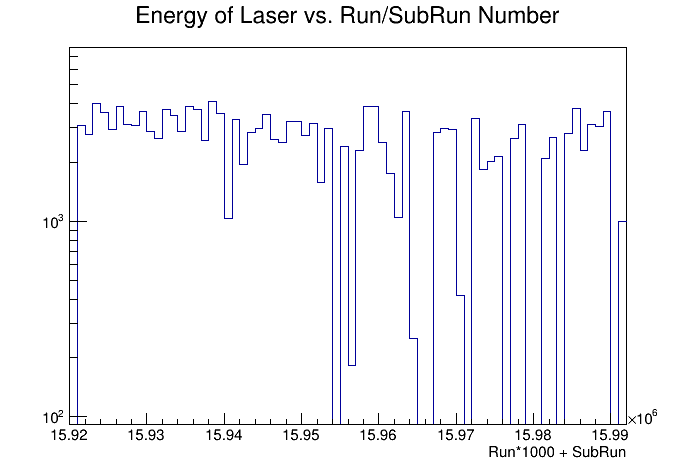

In [52]:
c = r.TCanvas()
hl.ProjectionX().Draw()
c.SetLogy()
c.Draw()

In [53]:
hl.SetDirectory(0)

In [54]:
hl.GetYaxis().SetRangeUser(0,6000)
hxl = hl.ProfileX().Clone()
hxl.SetTitle("Average Energy of Laser vs. Run/SubRun Number")

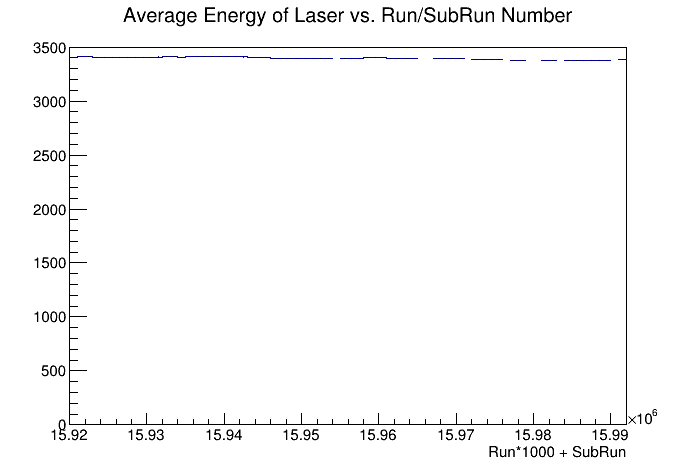

In [55]:
c = r.TCanvas()
hxl.GetYaxis().SetRangeUser(0,3500)
hxl.Draw()
c.Draw()

In [56]:
hxl_scaled = hxl.Clone()
hxl_scaled.SetTitle("Average Energy of Laser vs. Run/SubRun Number [Scaled to Max Bin]")
hxl_scaled.Scale(1/hxl_scaled.GetBinContent(hxl_scaled.GetMaximumBin()))
hxl_scaled.SetMarkerColor(28)
hxl_scaled.SetLineColor(28)

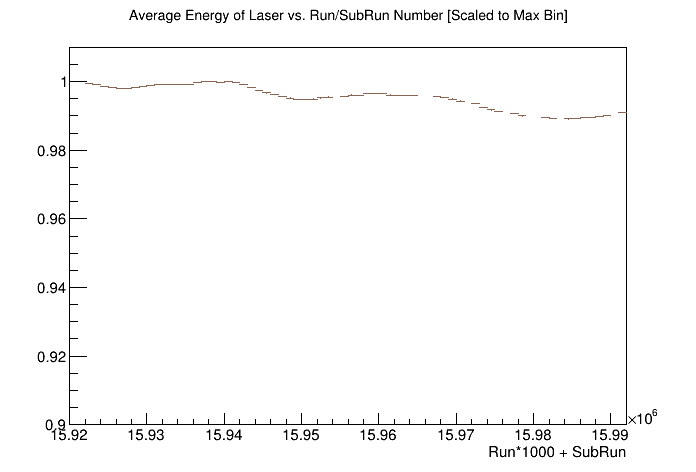

In [57]:
c = r.TCanvas()
hxl_scaled.GetYaxis().SetRangeUser(0.9,1.01)
hxl_scaled.Draw()
c.Draw()

---

### How do they compare?

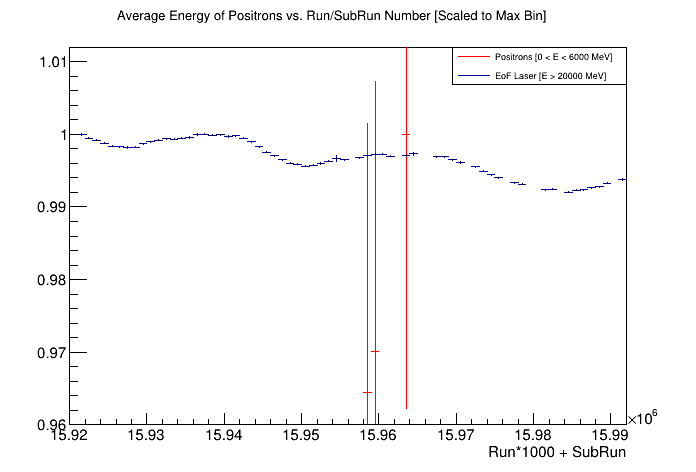

In [58]:
c = r.TCanvas()
hxp_scaled.GetYaxis().SetRangeUser(0.96,1.012)
hxp_scaled.Draw("")
hx_scaled.Draw("SAME")

leg = r.TLegend(0.65,0.82,0.9,0.9)
leg.AddEntry(hxp_scaled,"Positrons [0 < E < 6000 MeV]","l")
leg.AddEntry(hx_scaled,"EoF Laser [E > 20000 MeV]","l")
leg.Draw()

c.Draw()

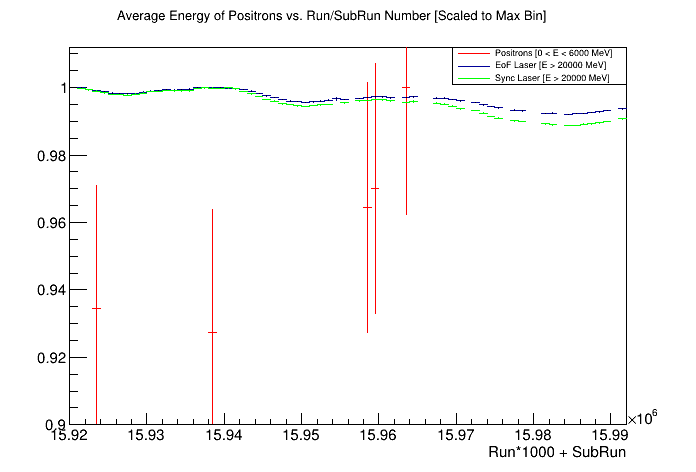

In [59]:
c = r.TCanvas()
hxp_scaled.GetYaxis().SetRangeUser(0.9,1.012)
hxp_scaled.Draw("")
hx_scaled.Draw("SAME")
hx3_scaled.Draw("SAME")

leg = r.TLegend(0.65,0.82,0.9,0.9)
leg.AddEntry(hxp_scaled,"Positrons [0 < E < 6000 MeV]","l")
leg.AddEntry(hx_scaled,"EoF Laser [E > 20000 MeV]","l")
leg.AddEntry(hx3_scaled,"Sync Laser [E > 20000 MeV]","l")
leg.Draw()

c.Draw()

In [60]:
c23runs = [15921.0, 15922.0, 15923.0, 15924.0, 15925.0, 15926.0, 15927.0, 15928.0, 15929.0, 15930.0, 15931.0, 15932.0, 15933.0, 15934.0, 15935.0, 15936.0, 15937.0, 15938.0, 15939.0, 15940.0, 15941.0, 15942.0, 15943.0, 15944.0, 15945.0, 15946.0, 15947.0, 15948.0, 15949.0, 15950.0, 15951.0, 15952.0, 15953.0, 15954.0, 15955.0, 15956.0, 15957.0, 15958.0, 15959.0, 15960.0, 15961.0, 15962.0, 15963.0, 15964.0, 15967.0, 15968.0, 15969.0, 15970.0, 15972.0, 15973.0, 15974.0, 15975.0, 15977.0, 15978.0, 15980.0, 15981.0, 15982.0, 15984.0, 15985.0, 15986.0, 15987.0, 15988.0, 15989.0, 15991.0]
c23temp = [38.807412131519285, 38.85216408268732, 38.90697725284337, 38.959470691163574, 38.98600344530579, 38.9819767441861, 38.935852999016724, 38.87422839506173, 38.846336395450564, 38.81376357560565, 38.78957194899818, 38.765893901420164, 38.7786405723905, 38.786122047244135, 38.784512937595125, 38.774861111111115, 38.761002604166634, 38.77541232638885, 38.71108990670062, 38.71688034188035, 38.78490823412699, 38.87856891701828, 38.95928184281844, 39.079289493575196, 39.173846153846114, 39.25206128747799, 39.320932539682545, 39.37151137357829, 39.38053333333331, 39.36202938475668, 39.31534391534392, 39.26375272331154, 39.244878472222204, 39.22555555555555, 39.195039682539644, 39.17638888888889, 39.14300044091713, 39.129354056437336, 39.11138451443567, 39.112434383202135, 39.10532015065913, 39.09321338383837, 39.089422222222176, 39.106196581196585, 39.088436692506434, 39.1133913764511, 39.20007309941517, 39.264709595959594, 39.3206459435626, 39.40079821200512, 39.46041092745635, 39.53913139329809, 39.64884982638889, 39.61105371900822, 39.592013888888886, 39.64356553819449, 39.631569664903, 39.63377425044092, 39.64938034188035, 39.6125777777778, 39.54366181657846, 39.479687500000026, 39.3824708781362, 39.300135501355]

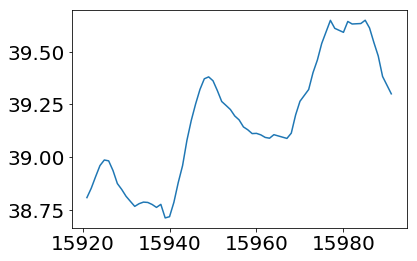

In [61]:
plt.plot(c23runs,c23temp)
plt.show()

In [62]:
ht = r.TH1D("ht","Temperature Avg. Per Run; Run*1000; Temperature [Centigrade]",
           int(72000/1000), 15920000, 15992000)

for i, run in enumerate(c23runs):
    bin = (ht.FindBin(run*1000))
    ht.SetBinContent(bin,c23temp[i])

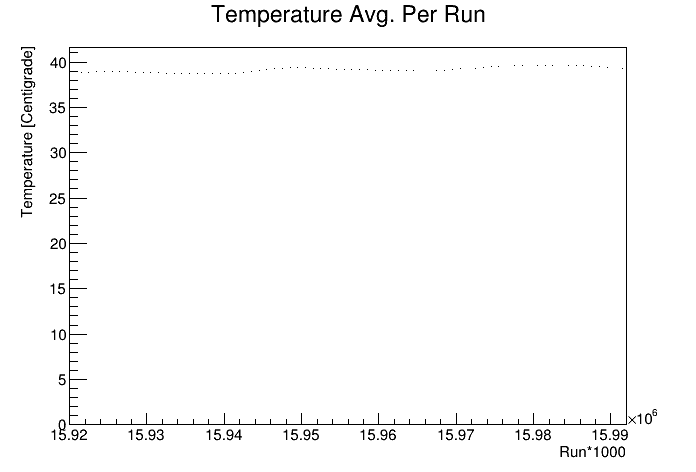

In [63]:
c = r.TCanvas()
ht.Draw("p")
c.Draw()

In [84]:
ht_scaled = ht.Clone("ht_scaled")
ht_scaled.Scale(1/np.max(c23temp))
ht_scaled.SetLineColor(0)
ht_scaled.SetMarkerColor(9)
ht_scaled.SetMarkerSize(0.25)
ht_scaled.SetMarkerStyle(8)

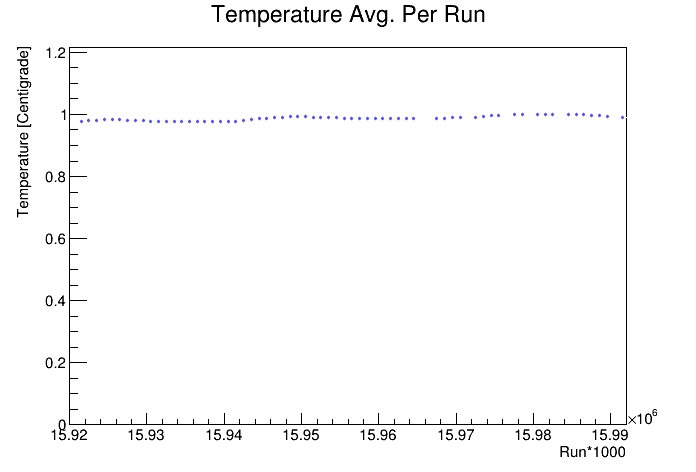

In [85]:
c = r.TCanvas()
ht_scaled.Draw("p")

c.Draw()

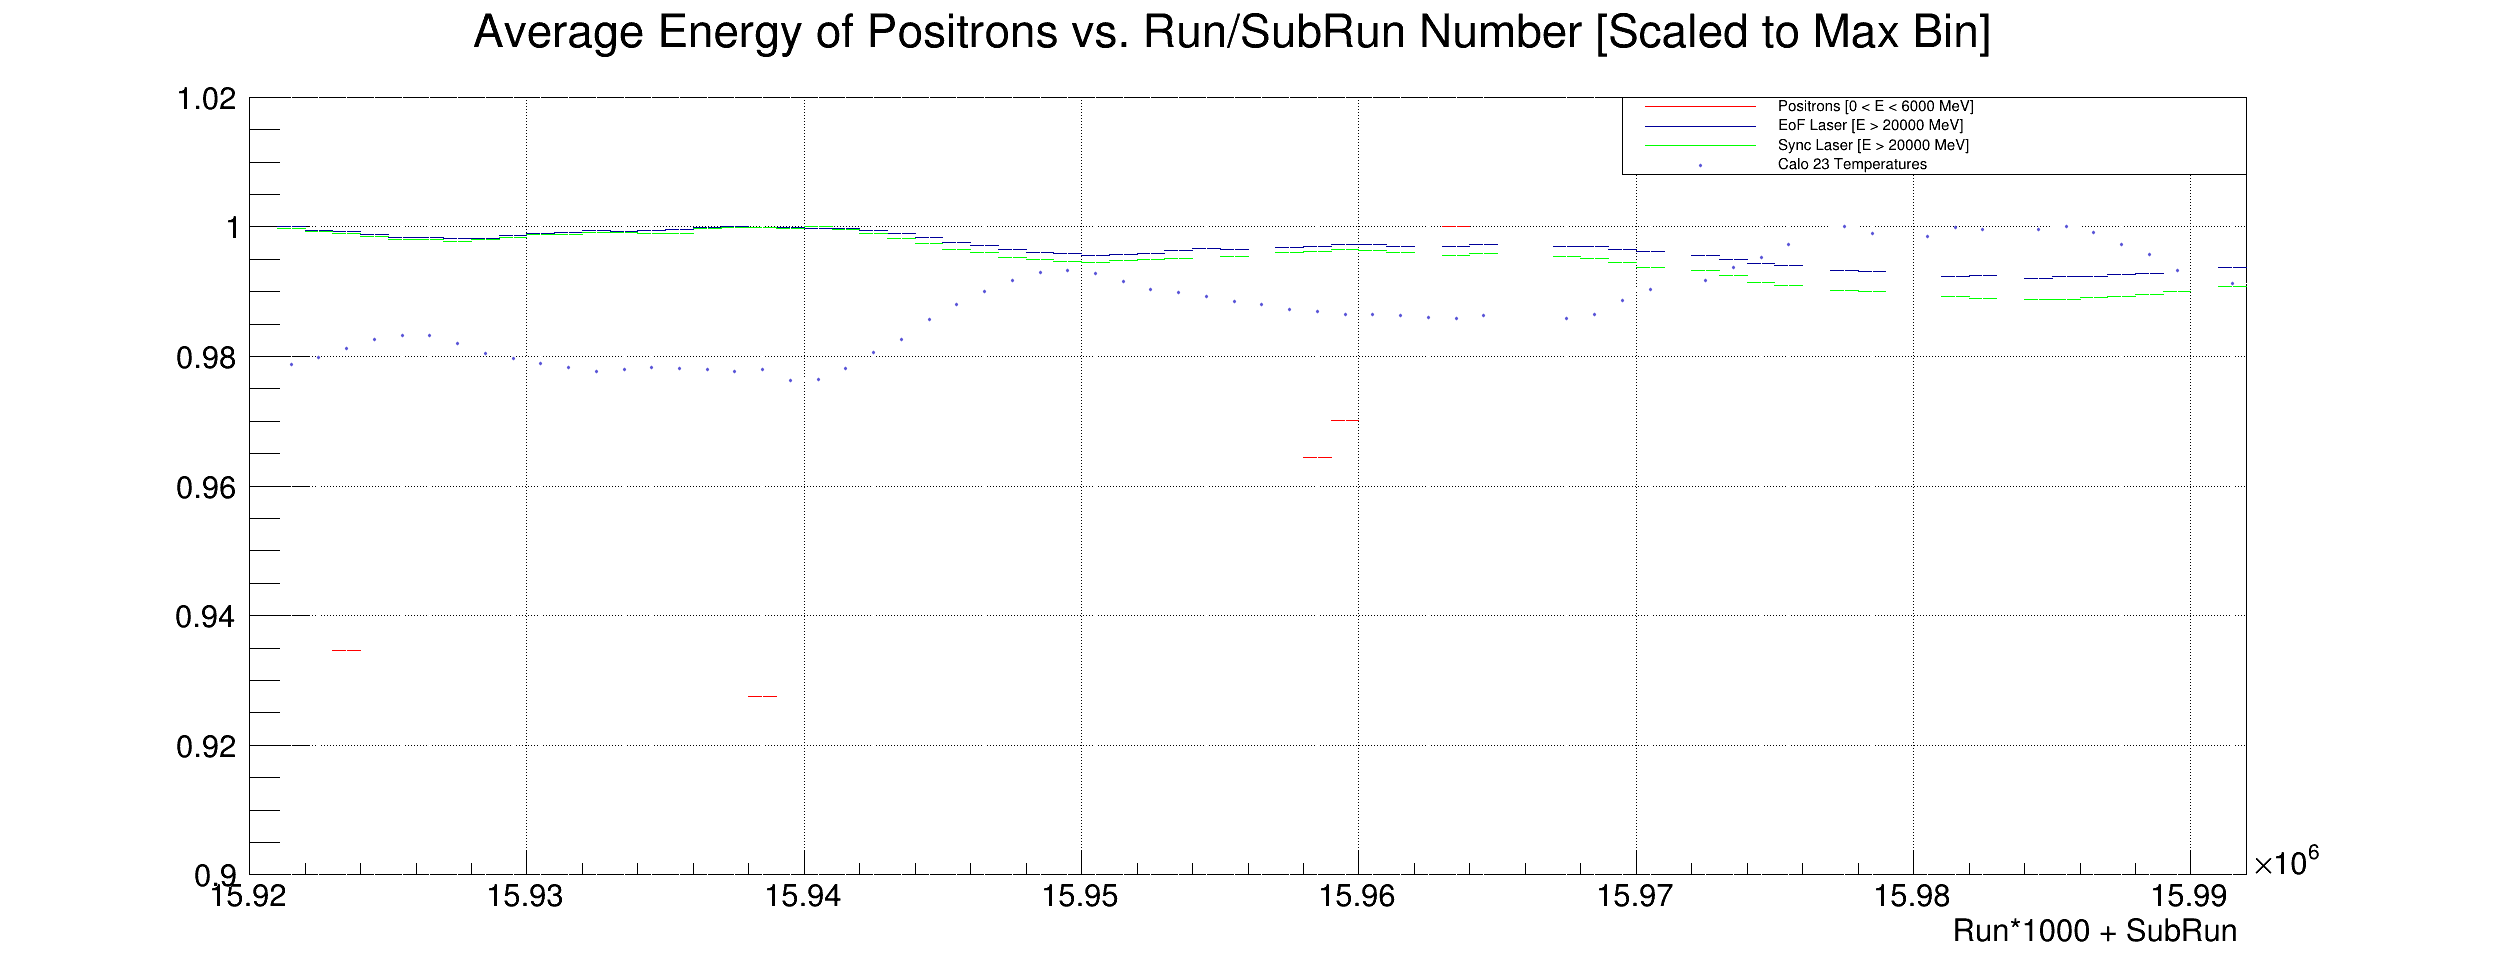

In [66]:
c = r.TCanvas("c","c",2500,1000)
hxp_scaled.GetYaxis().SetRangeUser(0.9,1.02)
hxp_scaled.Draw("")
hx_scaled.Draw("SAME")
hx3_scaled.Draw("SAME")
ht_scaled.Draw("SAME")

leg = r.TLegend(0.65,0.82,0.9,0.9)
leg.AddEntry(hxp_scaled,"Positrons [0 < E < 6000 MeV]","l")
leg.AddEntry(hx_scaled,"EoF Laser [E > 20000 MeV]","l")
leg.AddEntry(hx3_scaled,"Sync Laser [E > 20000 MeV]","l")
leg.AddEntry(ht_scaled,"Calo 23 Temperatures","p")
leg.Draw()

c.SetGrid()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


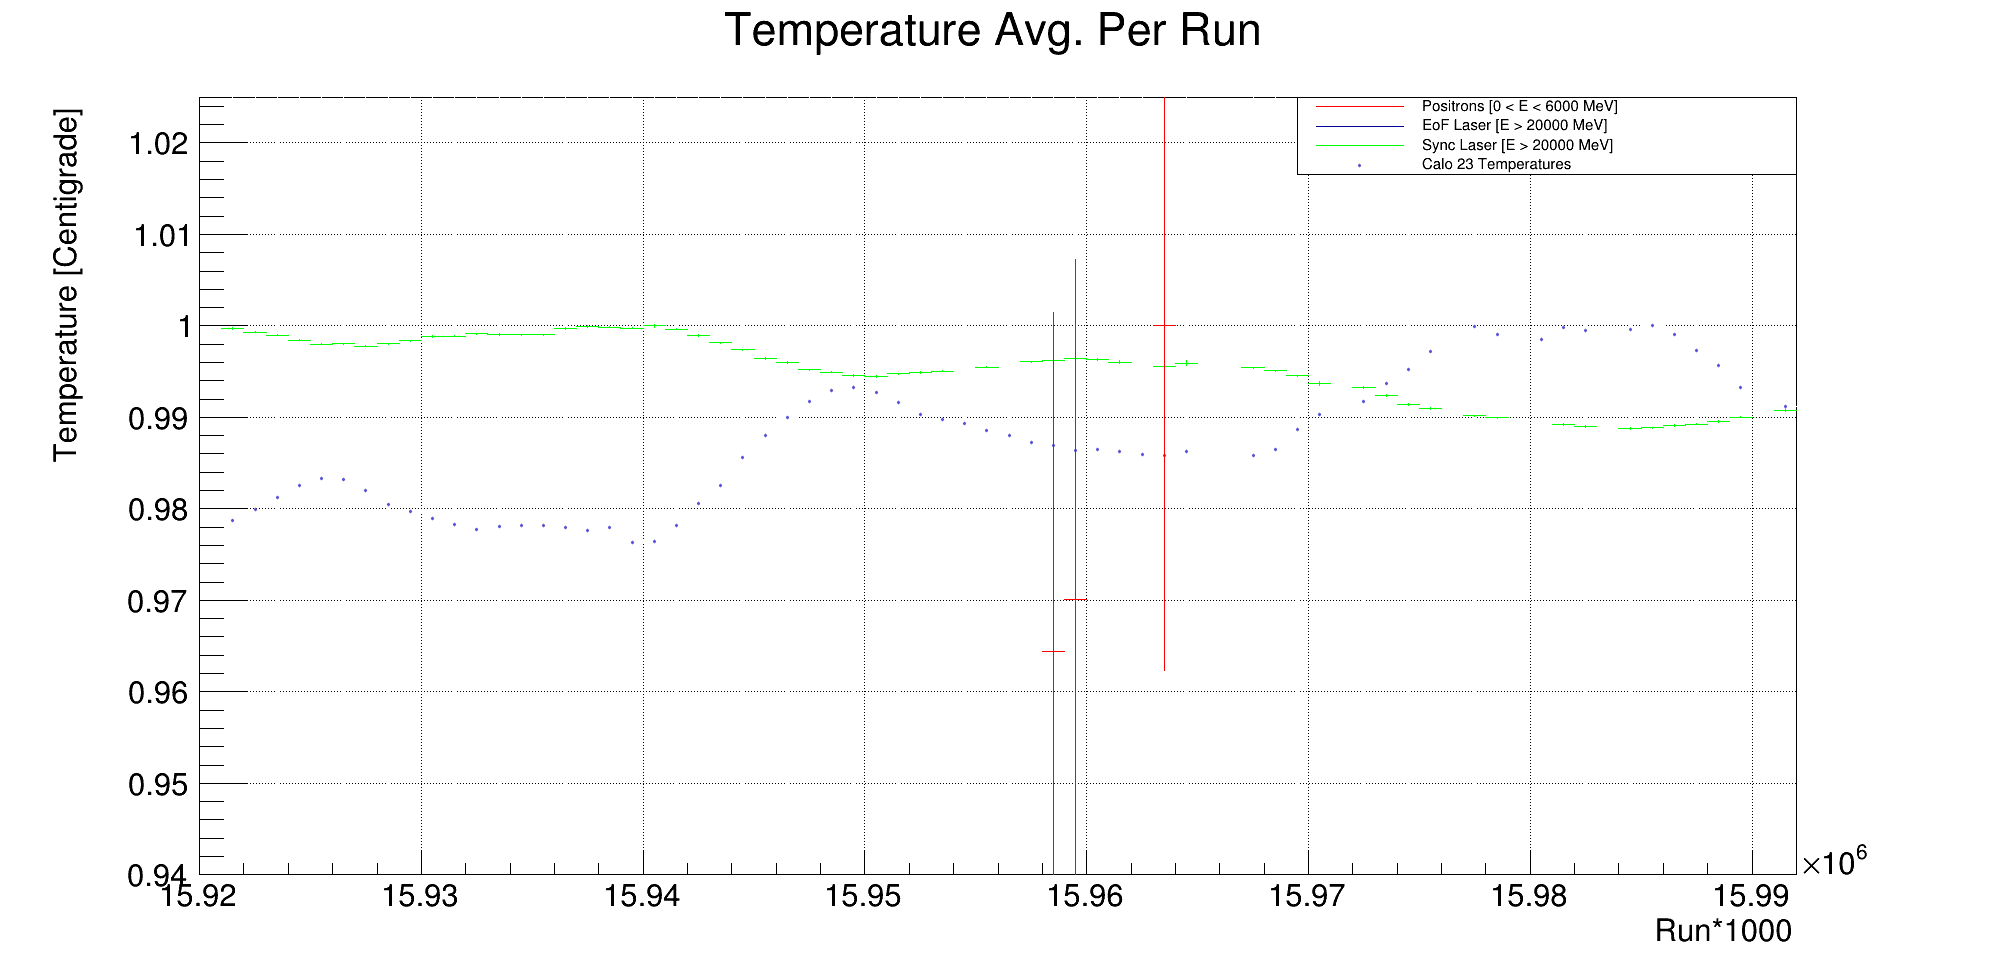

In [67]:
c = r.TCanvas("c","c",2000,1000)
ht_scaled.GetYaxis().SetRangeUser(0.94,1.025)
ht_scaled.Draw("")
#hx_scaled.Draw("SAME")
hx3_scaled.Draw("SAME")
hxp_scaled.Draw("SAME")

leg = r.TLegend(0.65,0.82,0.9,0.9)
leg.AddEntry(hxp_scaled,"Positrons [0 < E < 6000 MeV]","l")
leg.AddEntry(hx_scaled,"EoF Laser [E > 20000 MeV]","l")
leg.AddEntry(hx3_scaled,"Sync Laser [E > 20000 MeV]","l")
leg.AddEntry(ht_scaled,"Calo 23 Temperatures","p")
leg.Draw()

c.SetGrid()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


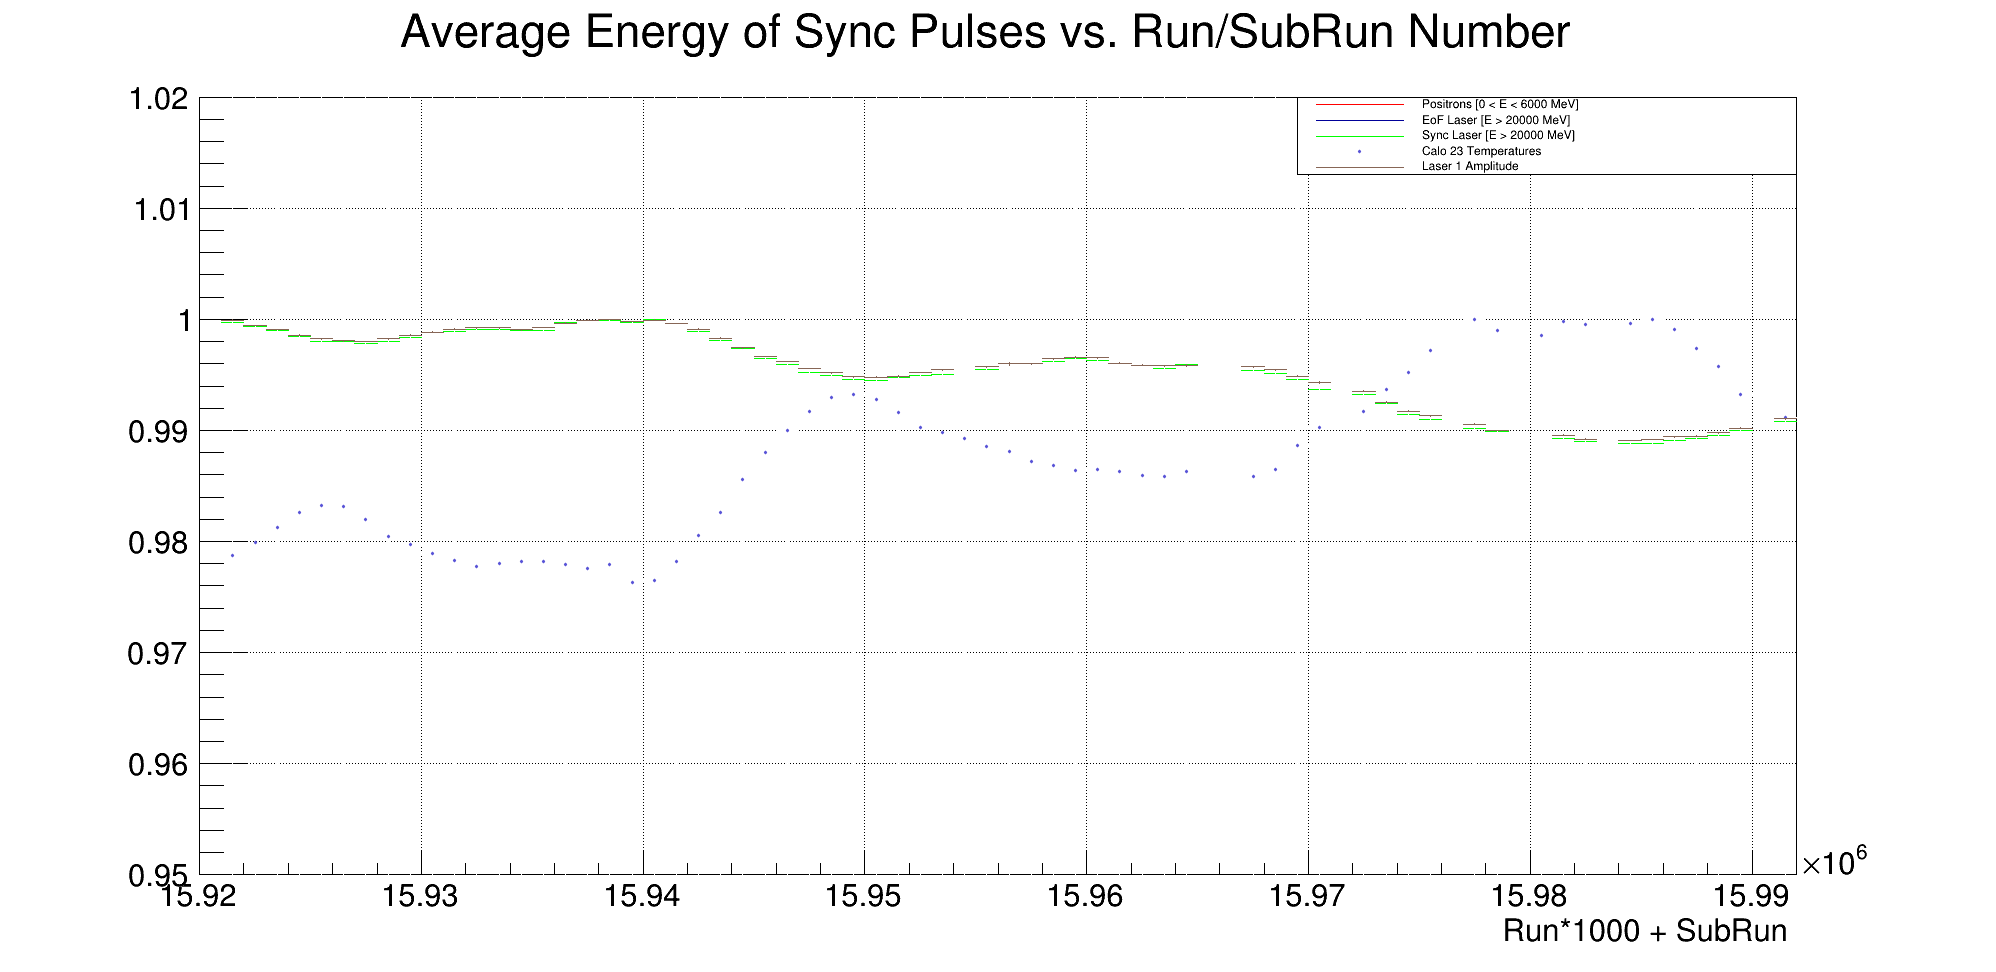

In [89]:
c = r.TCanvas("c","c",2000,1000)
hx3_scaled.GetYaxis().SetRangeUser(0.95,1.02)
#hxp_scaled.Draw("")
#hx_scaled.Draw("SAME")
hx3_scaled.Draw("")
ht_scaled.Draw("SAME")
hxl_scaled.Draw("SAME")

leg = r.TLegend(0.65,0.82,0.9,0.9)
leg.AddEntry(hxp_scaled,"Positrons [0 < E < 6000 MeV]","l")
leg.AddEntry(hx_scaled,"EoF Laser [E > 20000 MeV]","l")
leg.AddEntry(hx3_scaled,"Sync Laser [E > 20000 MeV]","l")
leg.AddEntry(ht_scaled,"Calo 23 Temperatures","p")
leg.AddEntry(hxl_scaled,"Laser 1 Amplitude","pl")
leg.Draw()

c.SetGrid()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


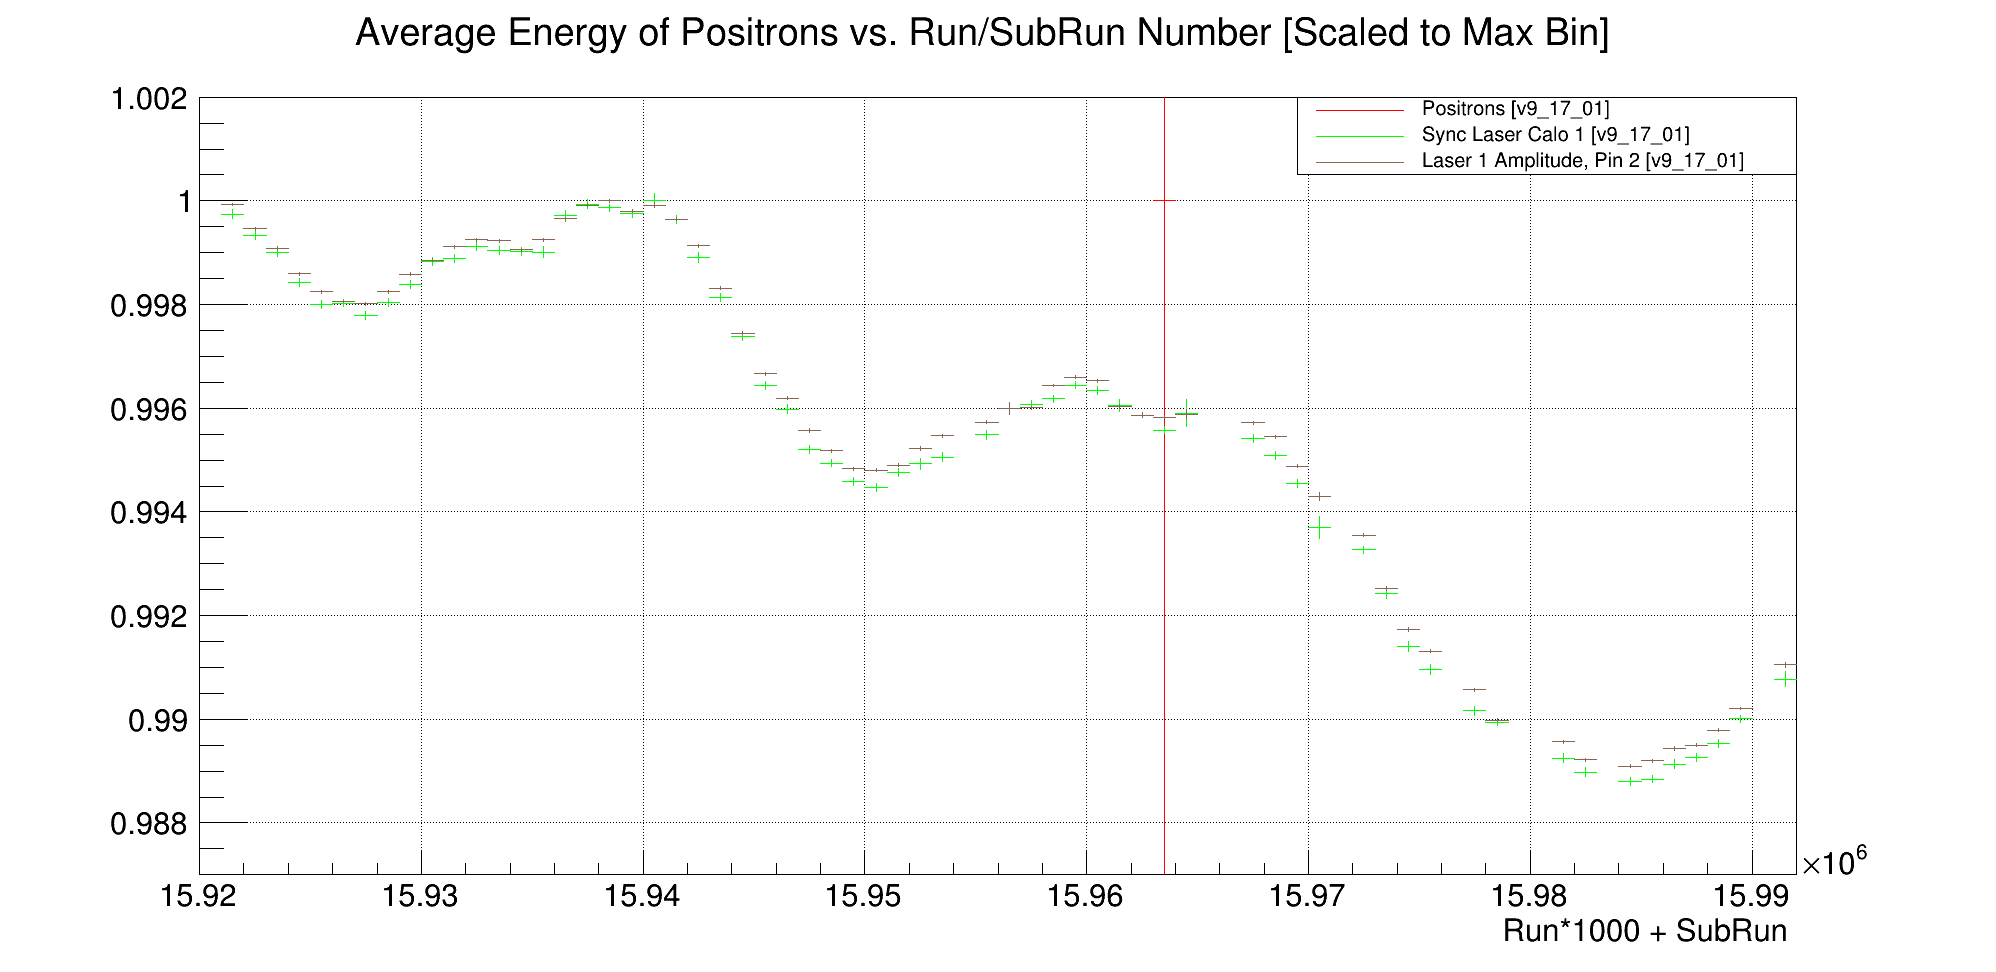

In [69]:
c = r.TCanvas("c","c",2000,1000)
hxp_scaled.GetYaxis().SetRangeUser(0.987,1.002)
hxp_scaled.Draw("")
#hx_scaled.Draw("")
hx3_scaled.Draw("SAME")
#ht_scaled.Draw("SAME")
hxl_scaled.Draw("SAME")

leg = r.TLegend(0.65,0.82,0.9,0.9)
leg.AddEntry(hxp_scaled,"Positrons [v9_17_01]","l")
#leg.AddEntry(hx_scaled,"EoF Laser Calo 23 [v9_16_01]","l")
leg.AddEntry(hx3_scaled,"Sync Laser Calo 1 [v9_17_01]","l")
#leg.AddEntry(ht_scaled,"Calo 23 Temperatures","p")
leg.AddEntry(hxl_scaled,"Laser 1 Amplitude, Pin 2 [v9_17_01]","pl")
leg.Draw()

c.SetGrid()
c.Draw()

In [70]:
diffvec = []
fracvec = []
centers = []
errs = []

for bin in range(hx3_scaled.GetNbinsX()):
    diff = hx3_scaled.GetBinContent(bin) - hxl_scaled.GetBinContent(bin)
    differr = np.sqrt( hx3_scaled.GetBinError(bin)**2 + hxl_scaled.GetBinError(bin)**2 ) 
    center = hx3_scaled.GetBinCenter(bin)
    if(diff == 0 or np.abs(diff) > 0.9 ):
        continue
    frac = hx3_scaled.GetBinContent(bin) / hxl_scaled.GetBinContent(bin)
    fracvec.append(frac)
    diffvec.append( diff )
    centers.append( int(center/1000. -0.5) )
    errs.append(differr)

In [71]:
np.mean(diffvec)

-0.00019569192548885006

In [72]:
print(centers)

[15921, 15922, 15923, 15924, 15925, 15926, 15927, 15928, 15929, 15930, 15931, 15932, 15933, 15934, 15935, 15936, 15937, 15938, 15939, 15940, 15941, 15942, 15943, 15944, 15945, 15946, 15947, 15948, 15949, 15950, 15951, 15952, 15953, 15955, 15957, 15958, 15959, 15960, 15961, 15963, 15964, 15967, 15968, 15969, 15970, 15972, 15973, 15974, 15975, 15977, 15978, 15981, 15982, 15984, 15985, 15986, 15987, 15988, 15989]


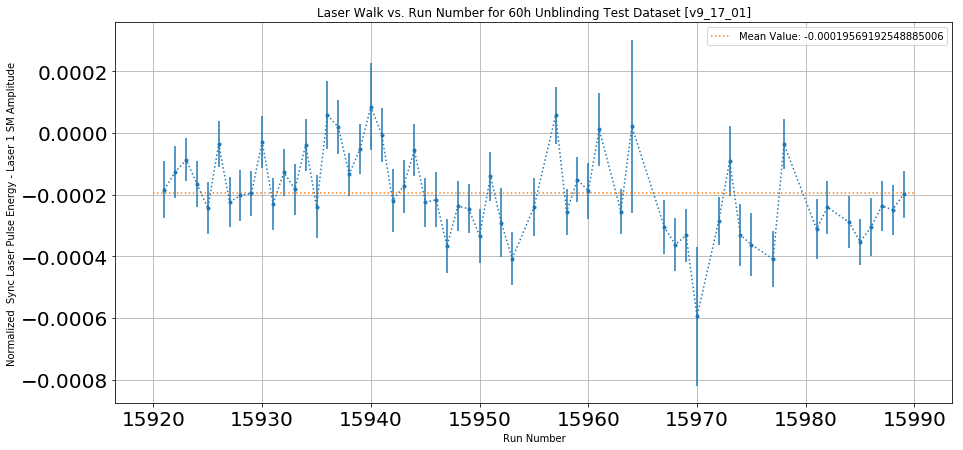

In [73]:
fig, ax = plt.subplots(figsize=(15,7))
plt.errorbar(centers,diffvec,yerr=errs,fmt=':.')
plt.plot([15920,15990],[np.mean(diffvec),np.mean(diffvec)],":",label="Mean Value: "+str(np.mean(diffvec)))
plt.ylabel("Normalized  Sync Laser Pulse Energy - Laser 1 SM Amplitude")
plt.xlabel("Run Number")
plt.title("Laser Walk vs. Run Number for 60h Unblinding Test Dataset [v9_17_01]")
plt.grid()
#plt.ylim(-0.01,0.01)
plt.legend()
plt.show()

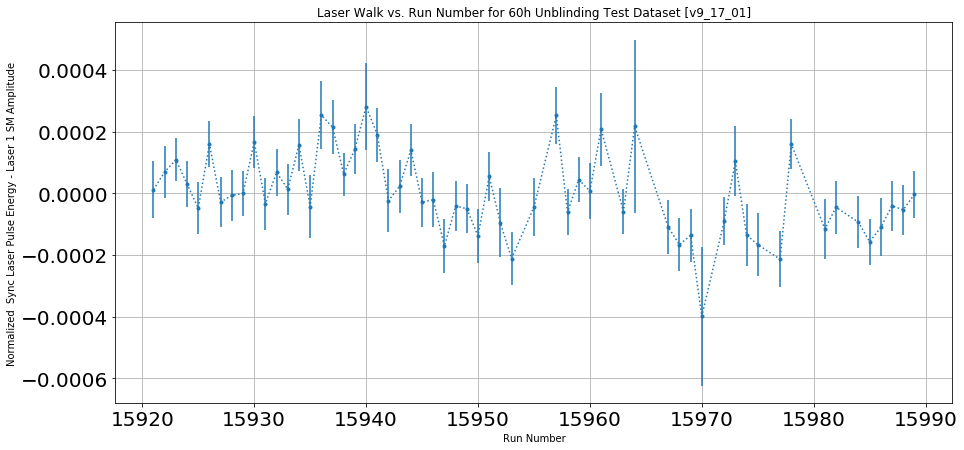

In [74]:
fig, ax = plt.subplots(figsize=(15,7))
plt.errorbar(centers,[x - np.mean(diffvec) for x in diffvec],yerr=errs,fmt=':.')
plt.ylabel("Normalized  Sync Laser Pulse Energy - Laser 1 SM Amplitude")
plt.xlabel("Run Number")
plt.title("Laser Walk vs. Run Number for 60h Unblinding Test Dataset [v9_17_01]")
plt.grid()
#plt.ylim(-0.01,0.01)
plt.show()

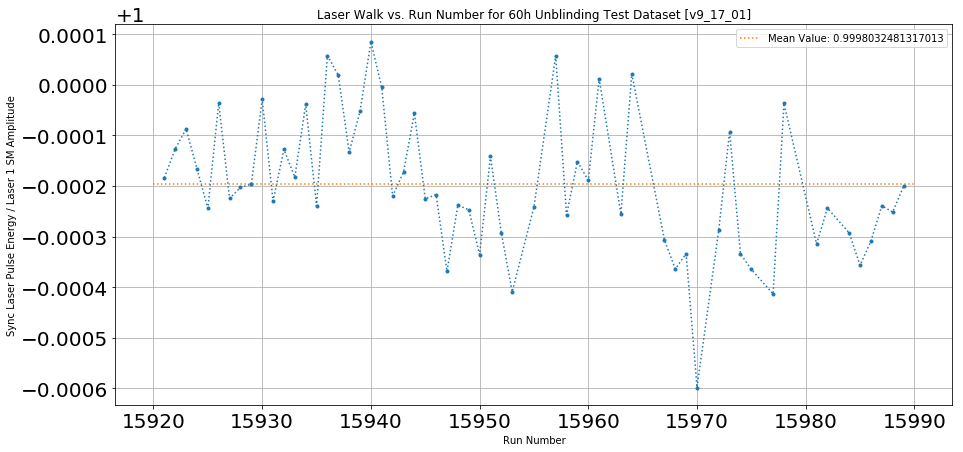

In [75]:
fig, ax = plt.subplots(figsize=(15,7))
plt.errorbar(centers,fracvec,fmt=':.')
plt.plot([15920,15990],[np.mean(fracvec),np.mean(fracvec)],":",label="Mean Value: "+str(np.mean(fracvec)))
plt.ylabel("Sync Laser Pulse Energy / Laser 1 SM Amplitude")
plt.xlabel("Run Number")
plt.title("Laser Walk vs. Run Number for 60h Unblinding Test Dataset [v9_17_01]")
plt.grid()
#plt.ylim(-0.01,0.01)
plt.legend()
plt.show()

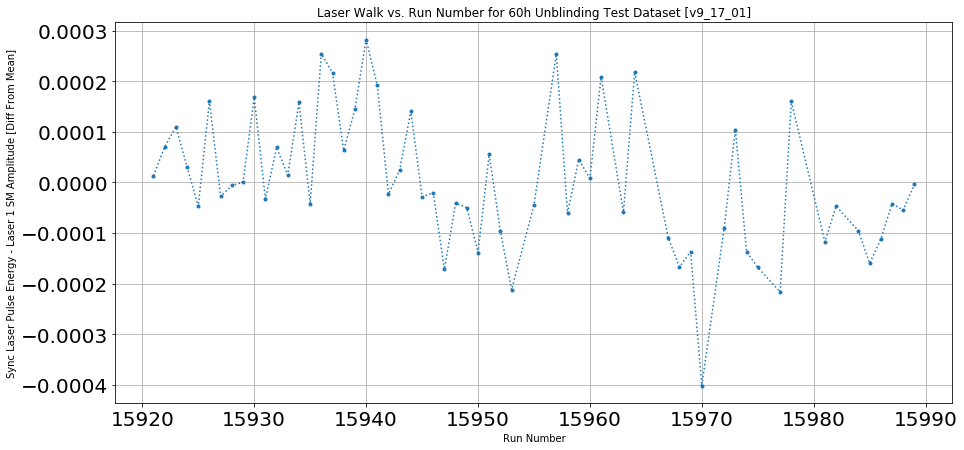

In [76]:
fig, ax = plt.subplots(figsize=(15,7))
plt.errorbar(centers,[x - np.mean(fracvec) for x in fracvec],fmt=':.')
plt.ylabel("Sync Laser Pulse Energy - Laser 1 SM Amplitude [Diff From Mean]")
plt.xlabel("Run Number")
plt.title("Laser Walk vs. Run Number for 60h Unblinding Test Dataset [v9_17_01]")
plt.grid()
#plt.ylim(-0.01,0.01)
plt.show()

---

### Is there temperature dependant pileup?


****************************************
Minimizer is Linear
Chi2                      =    0.0385608
NDf                       =           62
p0                        =     -3.78731   +/-   15.5336     
p1                        =  2.99273e-07   +/-   9.73635e-07 

****************************************
Minimizer is Linear
Chi2                      =      6079.58
NDf                       =           58
p0                        =      76.6486   +/-   2.79174     
p1                        =  -4.7723e-06   +/-   1.74949e-07 


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


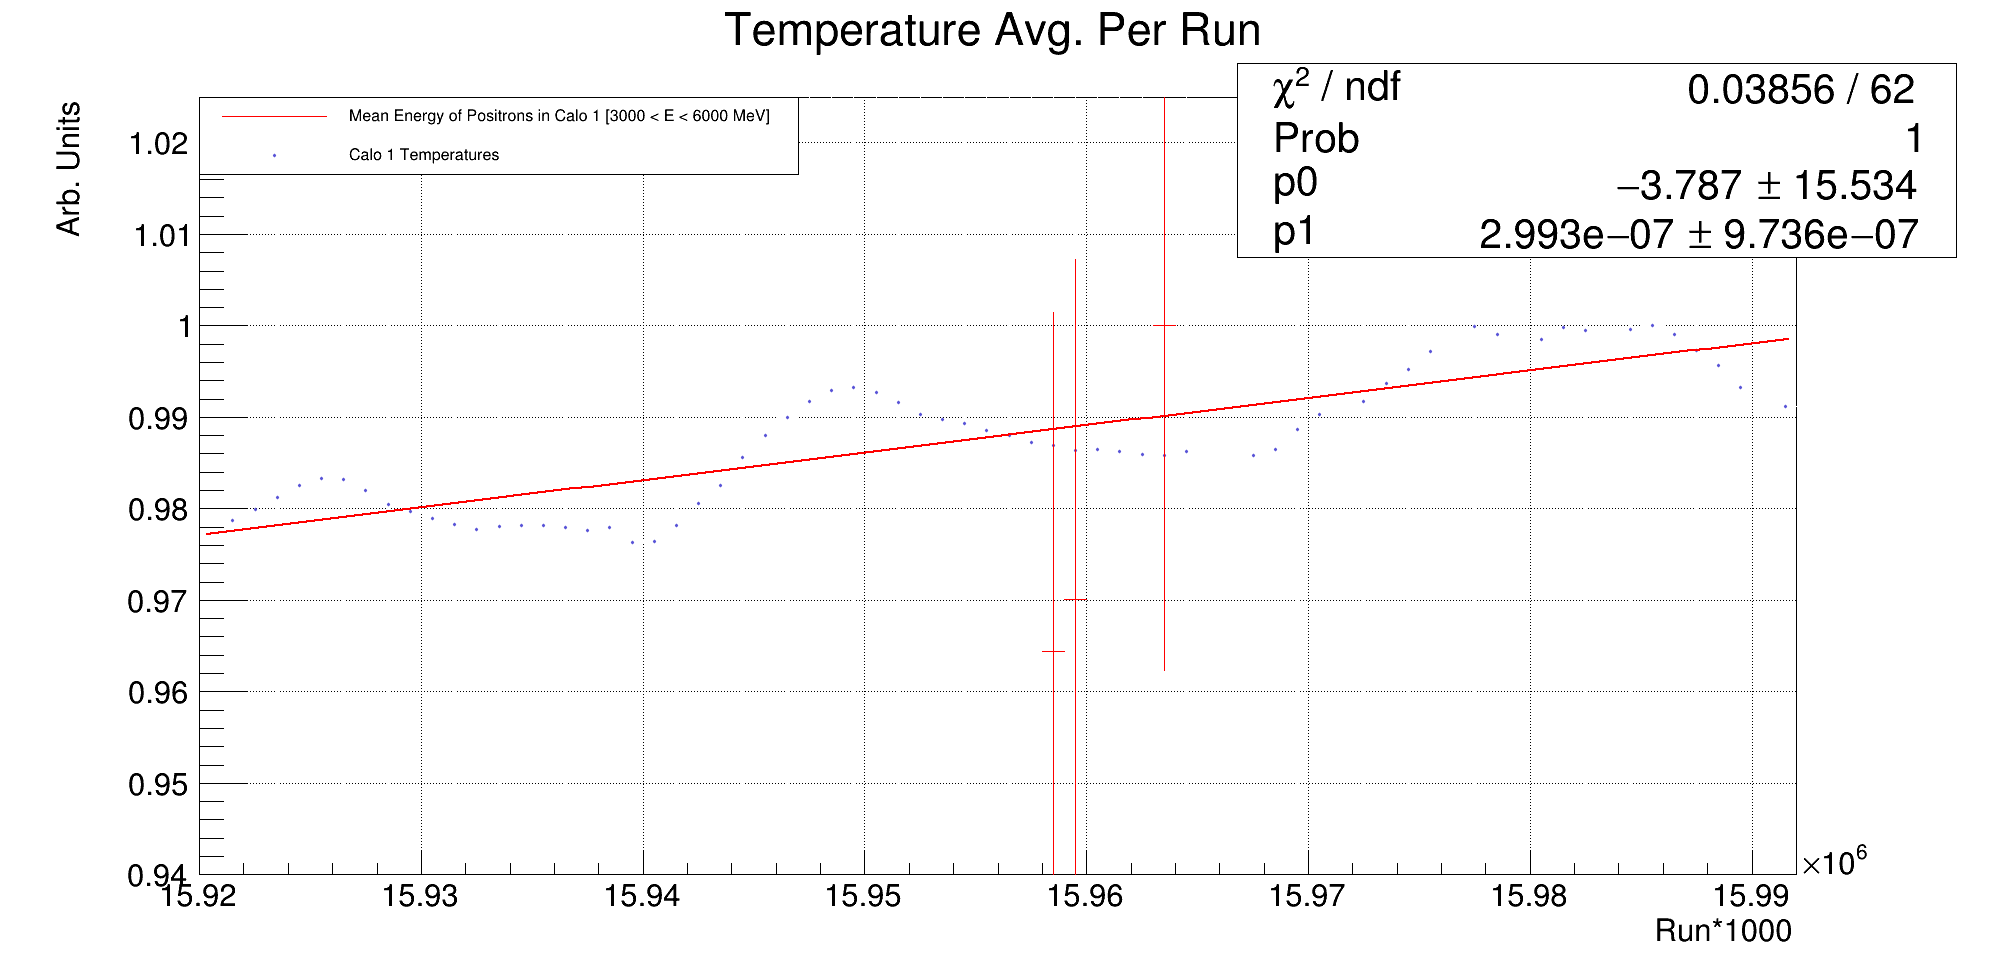

In [77]:
c = r.TCanvas("c","c",2000,1000)
ht_scaled.GetYaxis().SetRangeUser(0.94,1.025)
ht_scaled.Draw("")
#hx_scaled.Draw("SAME")
#hx3_scaled.Draw("SAME")
hxp_scaled.Draw("SAME")

ht_scaled.GetYaxis().SetTitle("Arb. Units")

leg = r.TLegend(0.1,0.82,0.4,0.9)
leg.AddEntry(hxp_scaled,"Mean Energy of Positrons in Calo 1 [3000 < E < 6000 MeV]","l")
#leg.AddEntry(hx_scaled,"EoF Laser [E > 20000 MeV]","l")
#leg.AddEntry(hx3_scaled,"Sync Laser [E > 20000 MeV]","l")
leg.AddEntry(ht_scaled,"Calo 1 Temperatures","p")
leg.Draw()

ht_scaled.Fit("pol1")
hxp_scaled.Fit("pol1")

c.SetGrid()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


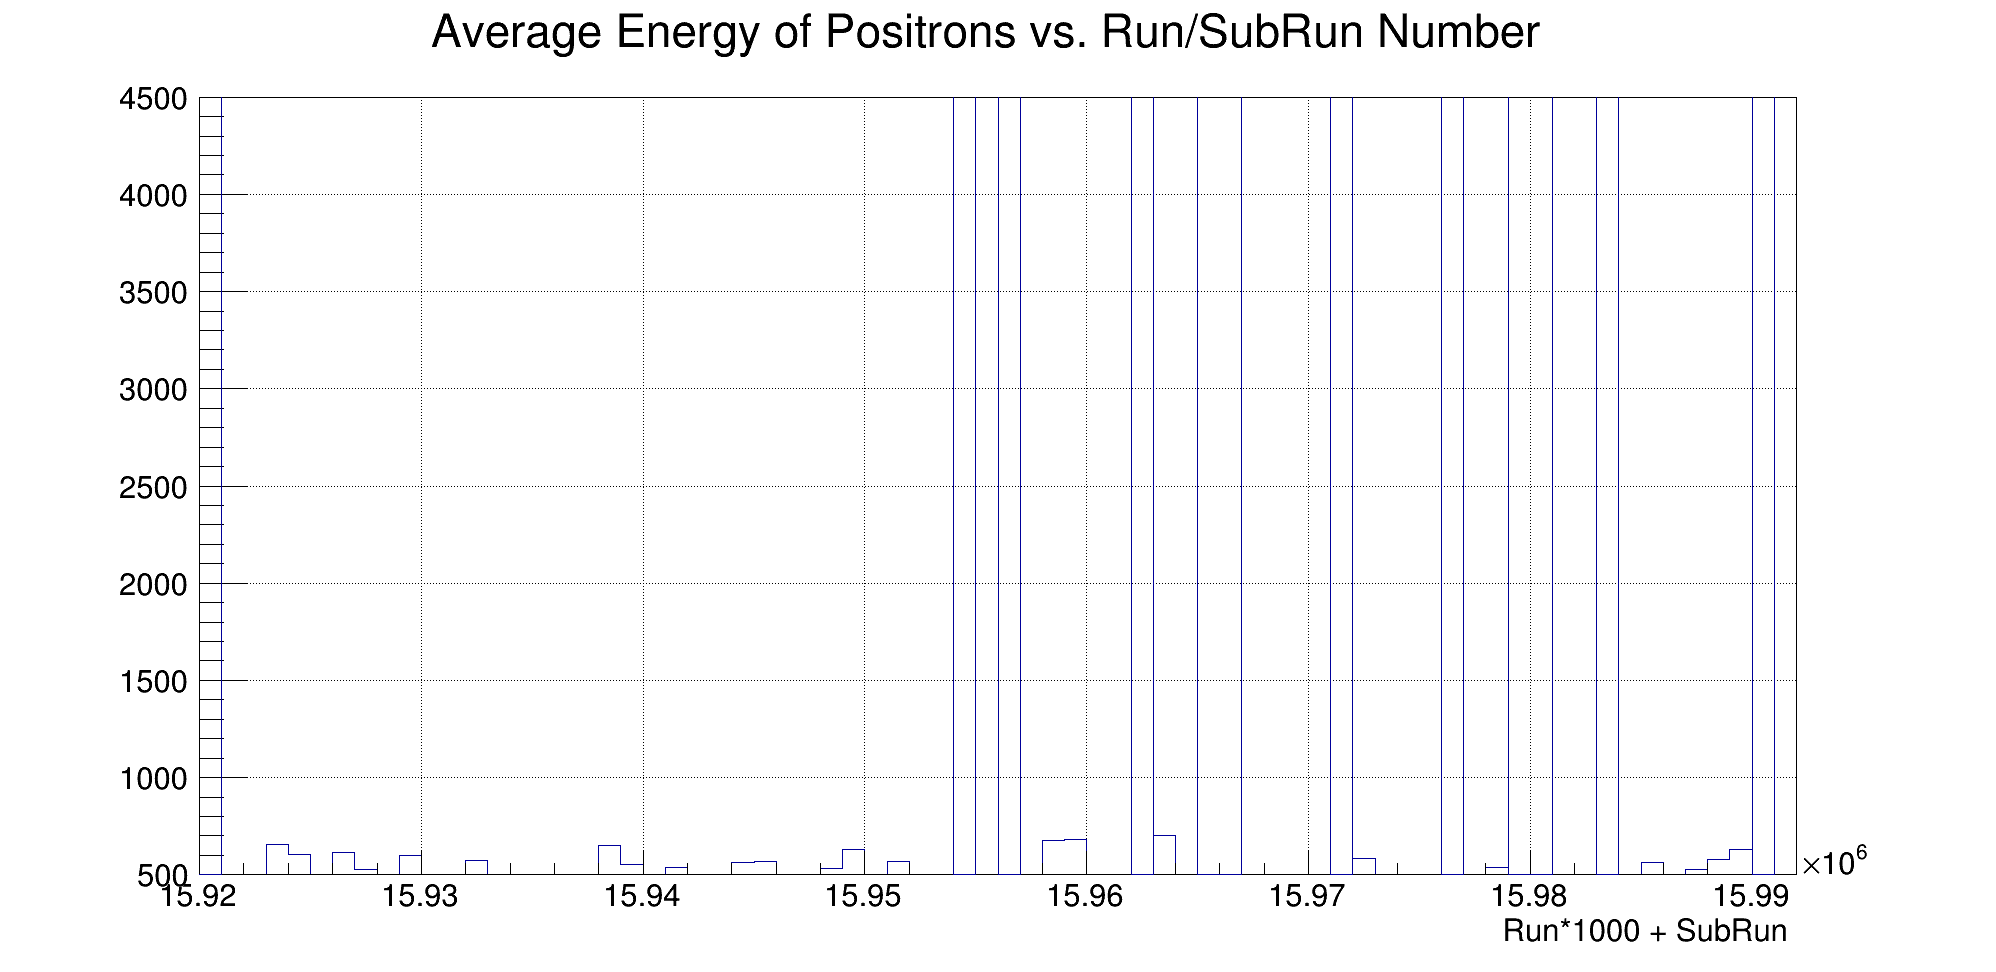

In [78]:
c = r.TCanvas("c","c",2000,1000)
hxp.Draw()
hxp2.Draw("SAME")
c.SetGrid()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


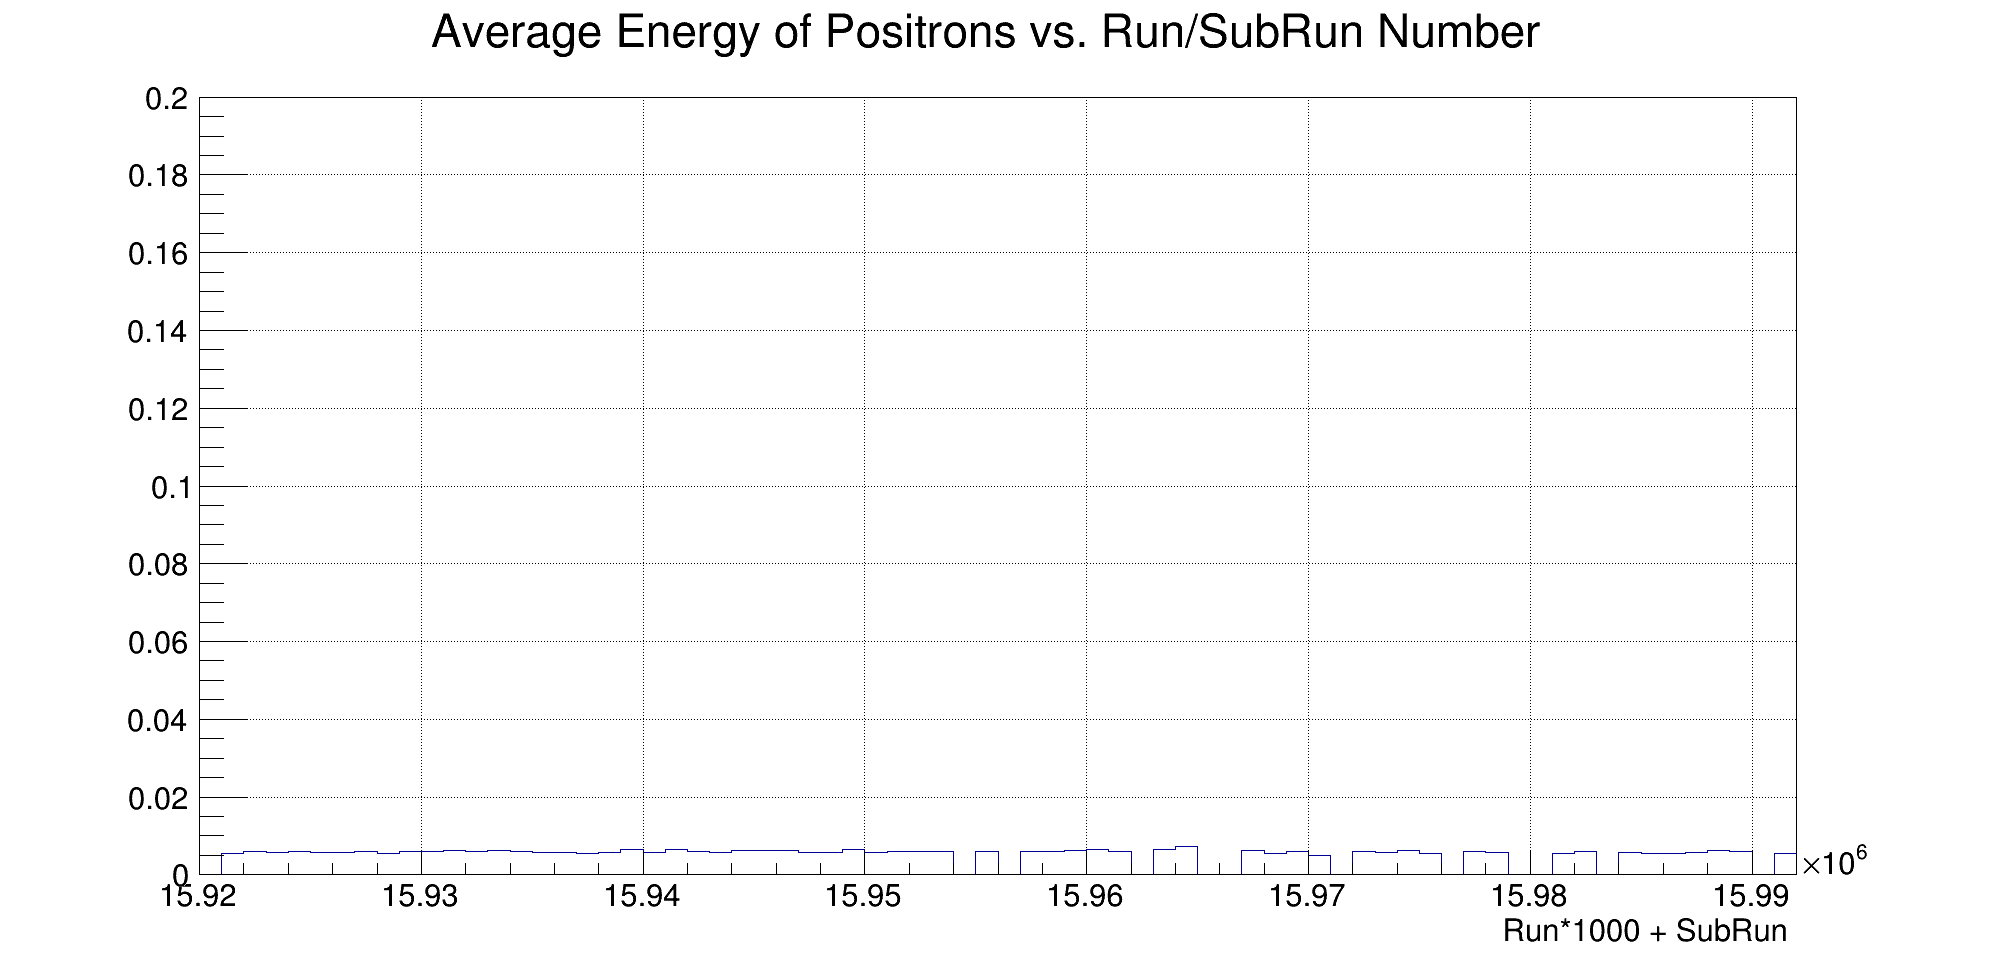

In [79]:
c = r.TCanvas("c","c",2000,1000)
hxp_ratio = hxp.Clone()
hxp_ratio.Divide(hxp2)
hxp_ratio.GetYaxis().SetRangeUser(0,0.2)
hxp_ratio.Draw("")
c.SetGrid()
c.Draw()

In [80]:
hxp_ratio_scaled = hxp_ratio.Clone("hxp_ratio_scaled")
hxp_ratio_scaled.Scale(1/hxp_ratio_scaled.GetBinContent(hxp_ratio_scaled.GetMaximumBin()))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


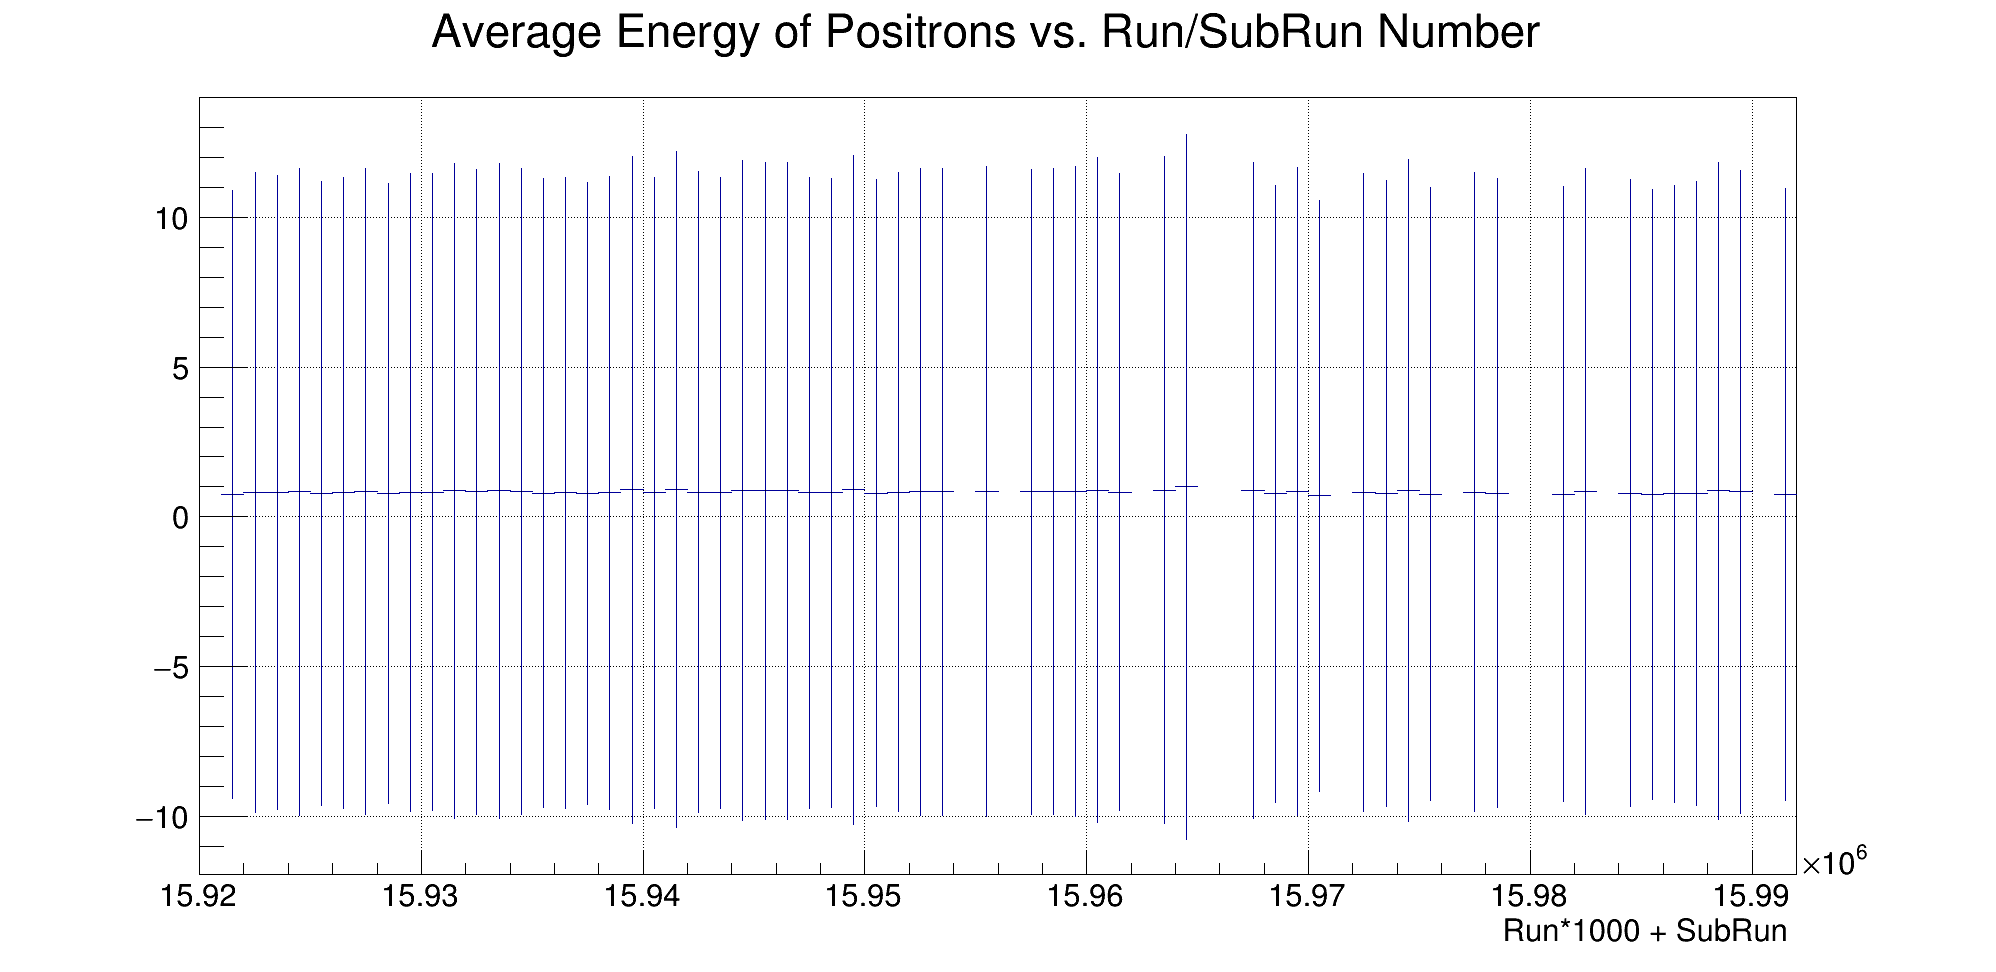

In [81]:
c = r.TCanvas("c","c",2000,1000)
hxp_ratio_scaled.Draw("")
c.SetGrid()
c.Draw()


****************************************
Minimizer is Linear
Chi2                      =    0.0385608
NDf                       =           62
p0                        =     -3.78731   +/-   15.5336     
p1                        =  2.99273e-07   +/-   9.73635e-07 

****************************************
Minimizer is Linear
Chi2                      =   0.00122157
NDf                       =           58
p0                        =      5.76654   +/-   1054.7      
p1                        = -3.10022e-07   +/-   6.61094e-05 


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


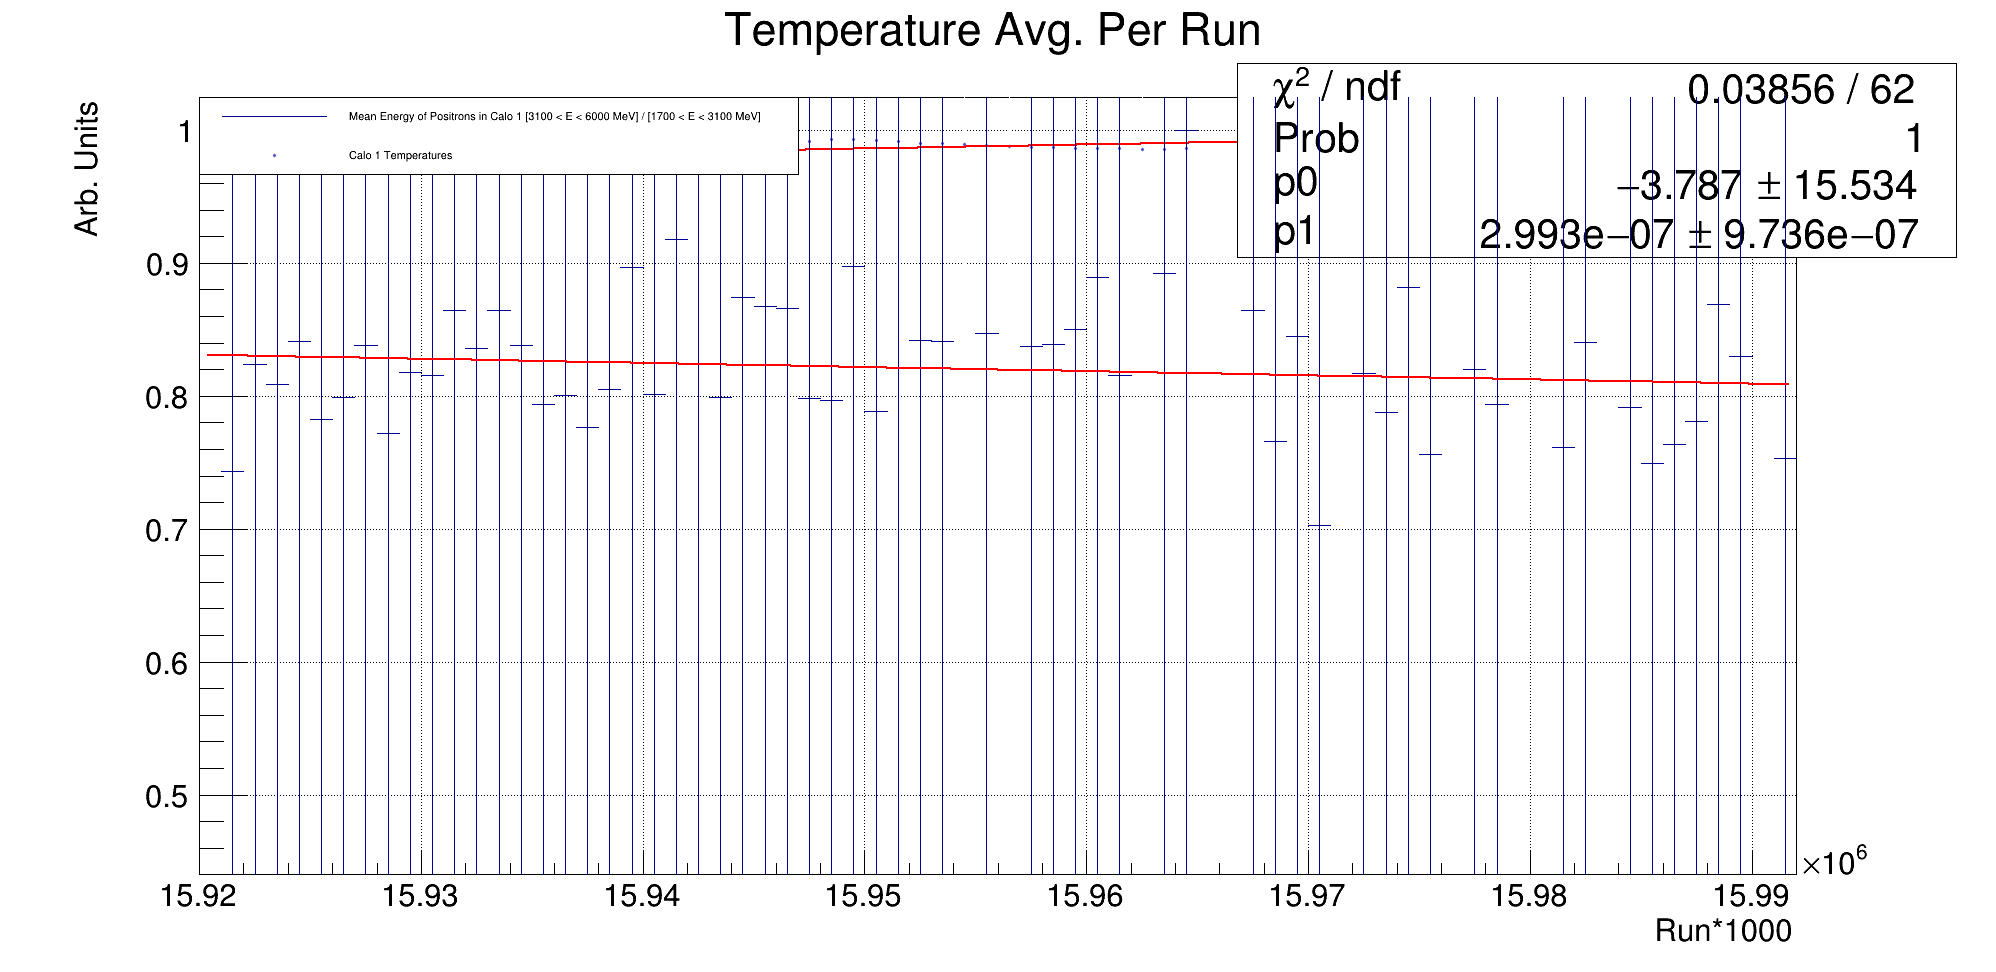

In [82]:
c = r.TCanvas("c","c",2000,1000)
ht_scaled.GetYaxis().SetRangeUser(0.44,1.025)
ht_scaled.Draw("")
#hx_scaled.Draw("SAME")
#hx3_scaled.Draw("SAME")
hxp_ratio_scaled.Draw("same")

ht_scaled.GetYaxis().SetTitle("Arb. Units")

leg = r.TLegend(0.1,0.82,0.4,0.9)
leg.AddEntry(hxp_ratio_scaled,"Mean Energy of Positrons in Calo 1 [3100 < E < 6000 MeV] / [1700 < E < 3100 MeV]","l")
#leg.AddEntry(hx_scaled,"EoF Laser [E > 20000 MeV]","l")
#leg.AddEntry(hx3_scaled,"Sync Laser [E > 20000 MeV]","l")
leg.AddEntry(ht_scaled,"Calo 1 Temperatures","p")
leg.Draw()

ht_scaled.Fit("pol1")
hxp_ratio_scaled.Fit("pol1")

c.SetGrid()
c.Draw()